In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
sales_train_df = pd.read_csv(r"E:\Academics\End To End Projects ML\Project -6 Sales Department\train.csv", low_memory=False)

In [3]:
sales_train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
sales_train_df.shape

(1017209, 9)

In [5]:
sales_train_df.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,"1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00"
mean,558.43,4.00,"5,773.82",633.15,0.83,0.38,0.18
std,321.91,2.00,"3,849.93",464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,"3,727.00",405.00,1.00,0.00,0.00
50%,558.00,4.00,"5,744.00",609.00,1.00,0.00,0.00
75%,838.00,6.00,"7,856.00",837.00,1.00,1.00,0.00
max,"1,115.00",7.00,"41,551.00","7,388.00",1.00,1.00,1.00


In [8]:
store_info_df = pd.read_csv(r"E:\Academics\End To End Projects ML\Project -6 Sales Department\store.csv")

In [9]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,"2,007.00",1,13.00,"2,010.00","Jan,Apr,Jul,Oct"
2,3,a,a,"14,130.00",12.00,"2,006.00",1,14.00,"2,011.00","Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,"2,009.00",0,NaN,NaN,NaN
4,5,a,a,"29,910.00",4.00,"2,015.00",0,NaN,NaN,NaN


In [10]:
store_info_df.shape

(1115, 10)

In [11]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,"1,115.00","1,112.00",761.00,761.00,"1,115.00",571.00,571.00
mean,558.00,"5,404.90",7.22,"2,008.67",0.51,23.60,"2,011.76"
std,322.02,"7,663.17",3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,"1,900.00",0.00,1.00,"2,009.00"
25%,279.50,717.50,4.00,"2,006.00",0.00,13.00,"2,011.00"
50%,558.00,"2,325.00",8.00,"2,010.00",1.00,22.00,"2,012.00"
75%,836.50,"6,882.50",10.00,"2,013.00",1.00,37.00,"2,013.00"
max,"1,115.00","75,860.00",12.00,"2,015.00",1.00,50.00,"2,015.00"


In [12]:
sales_train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

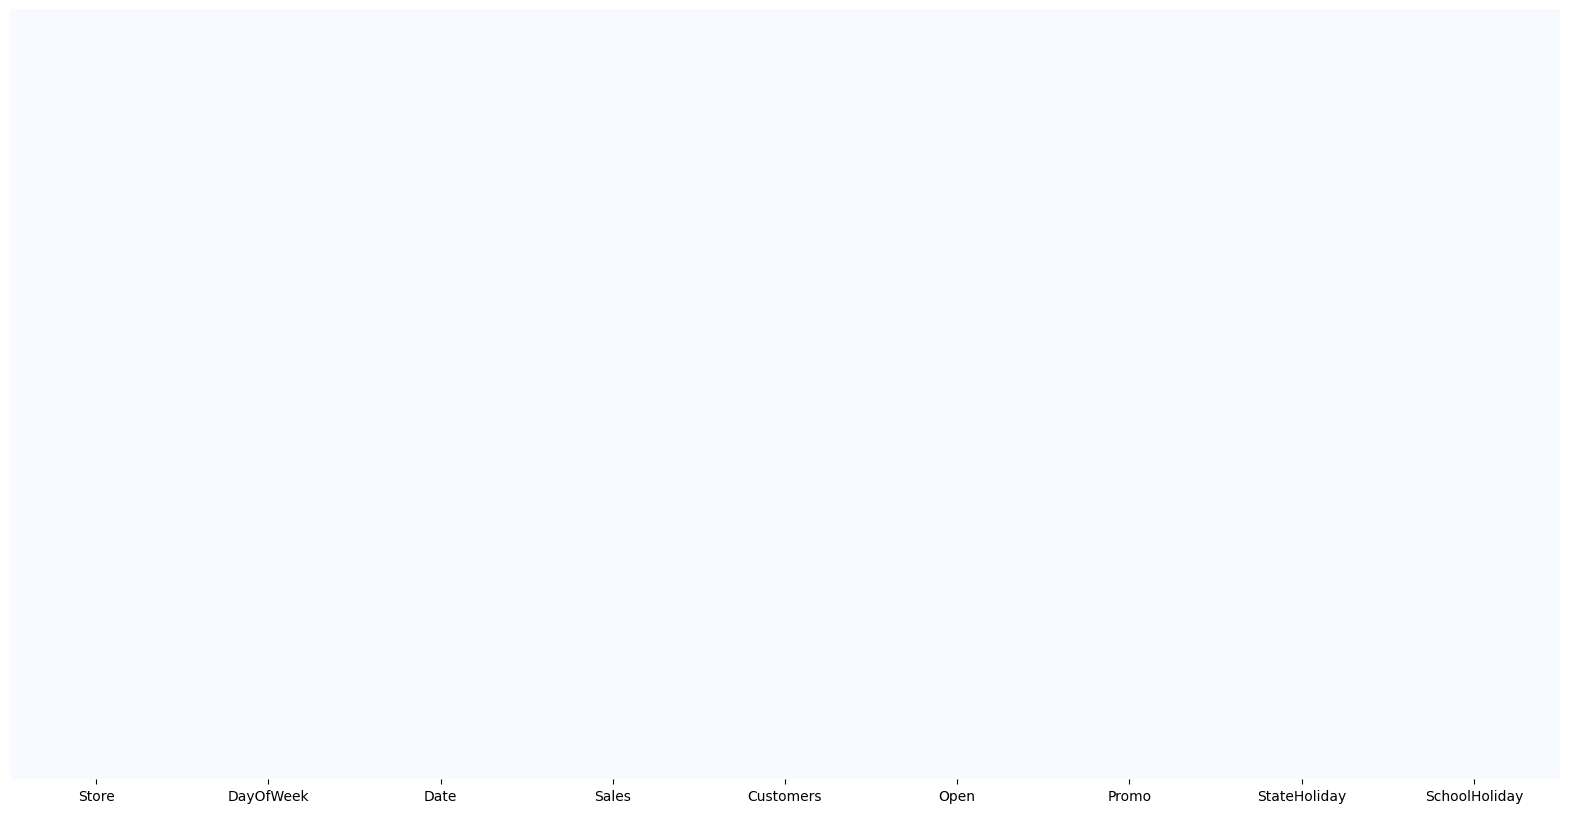

In [13]:
sns.heatmap(sales_train_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()


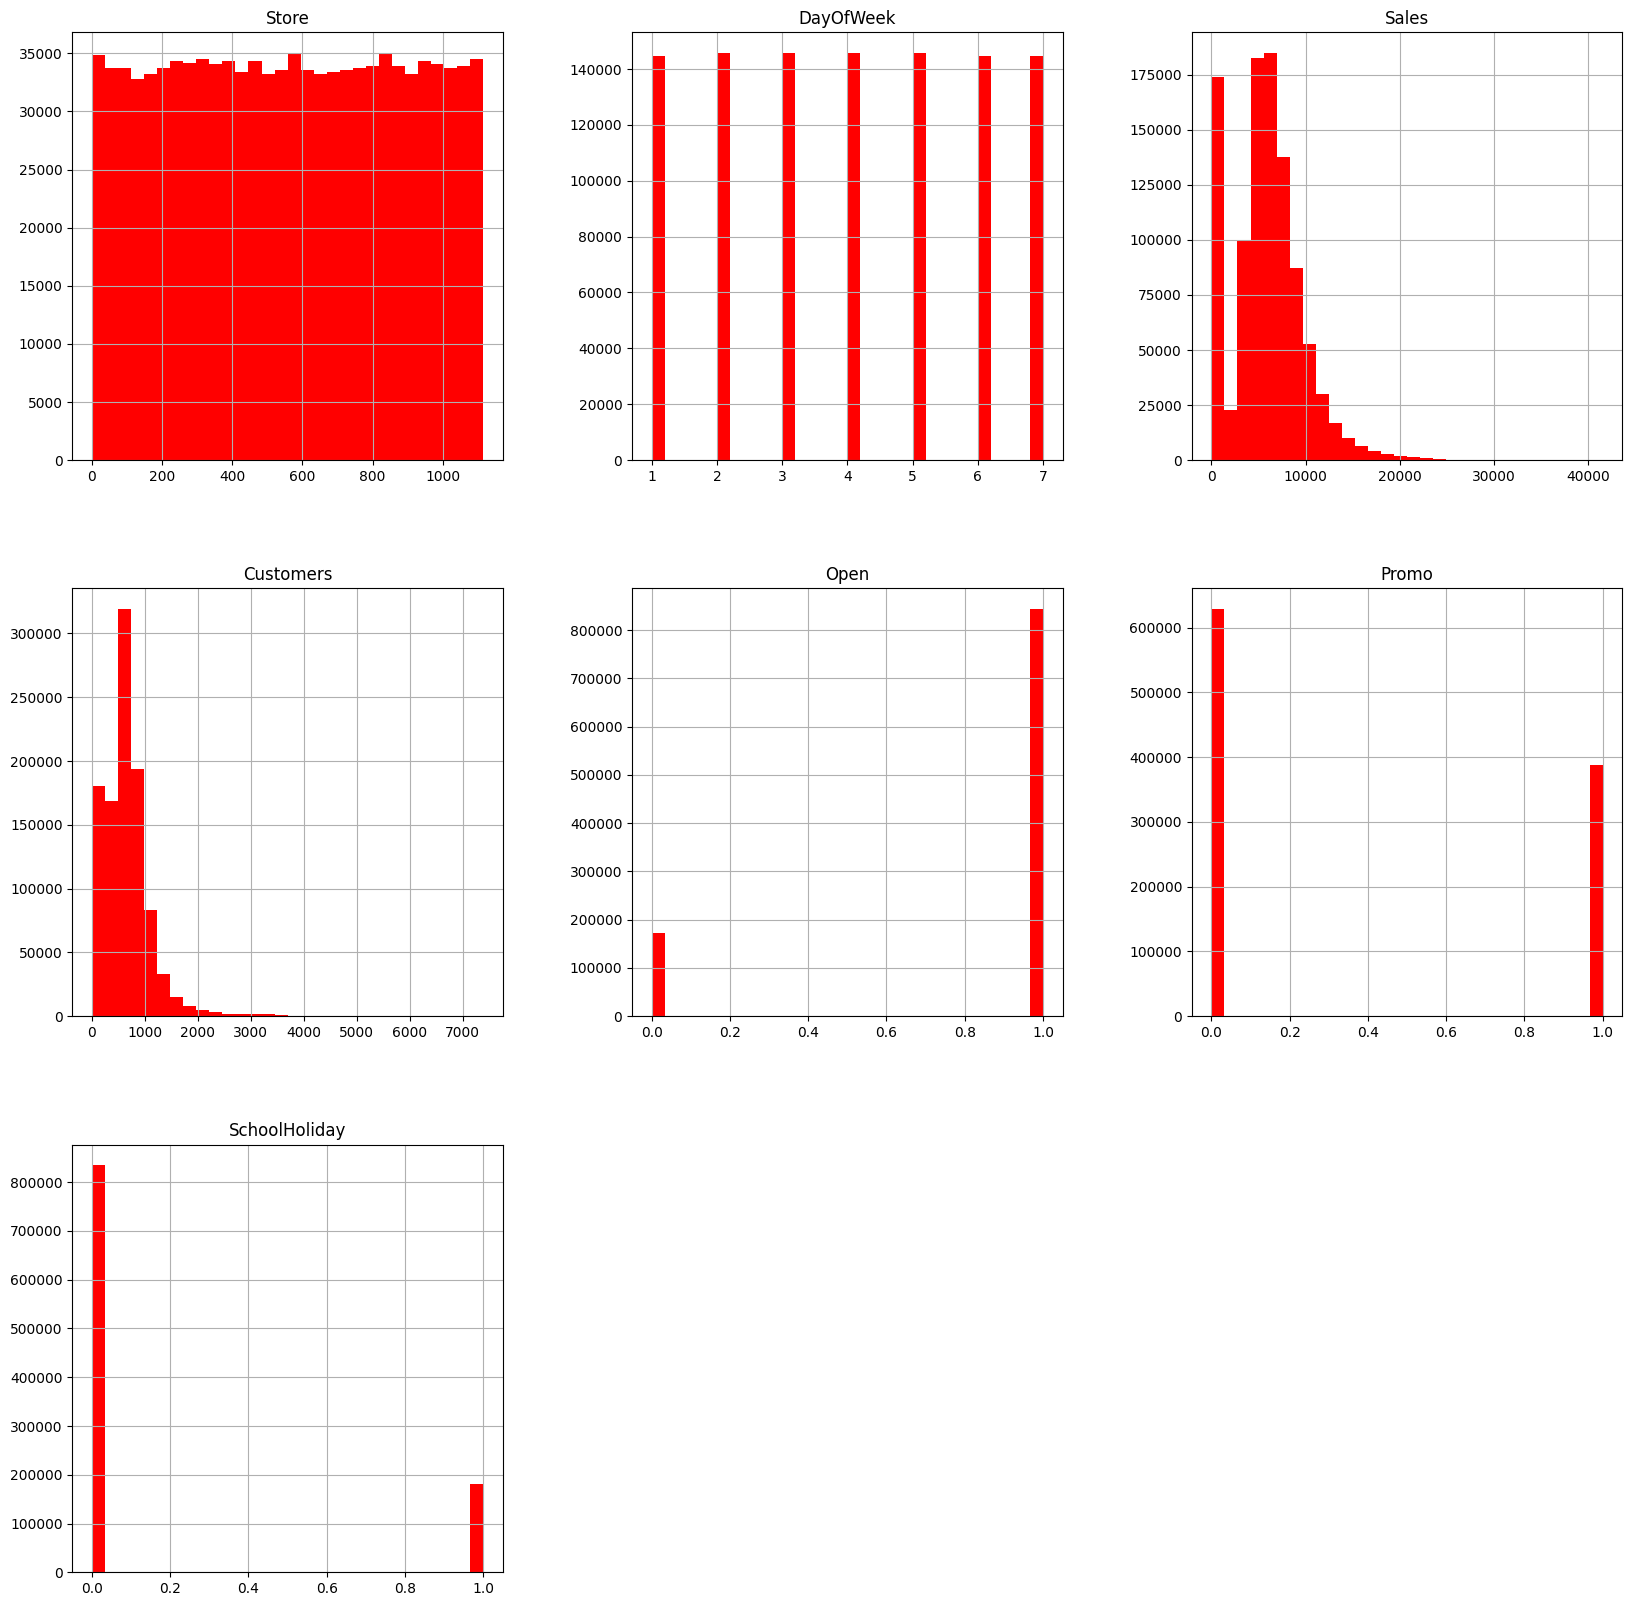

In [14]:
sales_train_df.hist(bins=30, figsize=(20,20), color="r")
plt.show()

In [15]:
sales_train_df["Customers"].max()

7388

In [16]:
closed_train_df = sales_train_df[sales_train_df["Open"] == 0]

In [17]:
open_train_df = sales_train_df[sales_train_df["Open"]==1]

In [18]:
closed_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [19]:
open_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [20]:
print(f"Total = {len(sales_train_df)}")

Total = 1017209


In [21]:
print(f"Number of stores closed = {len(closed_train_df)}")

Number of stores closed = 172817


In [22]:
print(f"Number of stores Open = {len(open_train_df)}")

Number of stores Open = 844392


In [23]:
sales_train_df = sales_train_df[sales_train_df["Open"]==1]

In [24]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [25]:
len(sales_train_df)

844392

In [26]:
sales_train_df.drop(columns=["Open"], inplace=True)

In [27]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


In [28]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,"844,392.00","844,392.00","844,392.00","844,392.00","844,392.00","844,392.00"
mean,558.42,3.52,"6,955.51",762.73,0.45,0.19
std,321.73,1.72,"3,104.21",401.23,0.50,0.40
min,1.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,"4,859.00",519.00,0.00,0.00
50%,558.00,3.00,"6,369.00",676.00,0.00,0.00
75%,837.00,5.00,"8,360.00",893.00,1.00,0.00
max,"1,115.00",7.00,"41,551.00","7,388.00",1.00,1.00


In [29]:
store_info_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

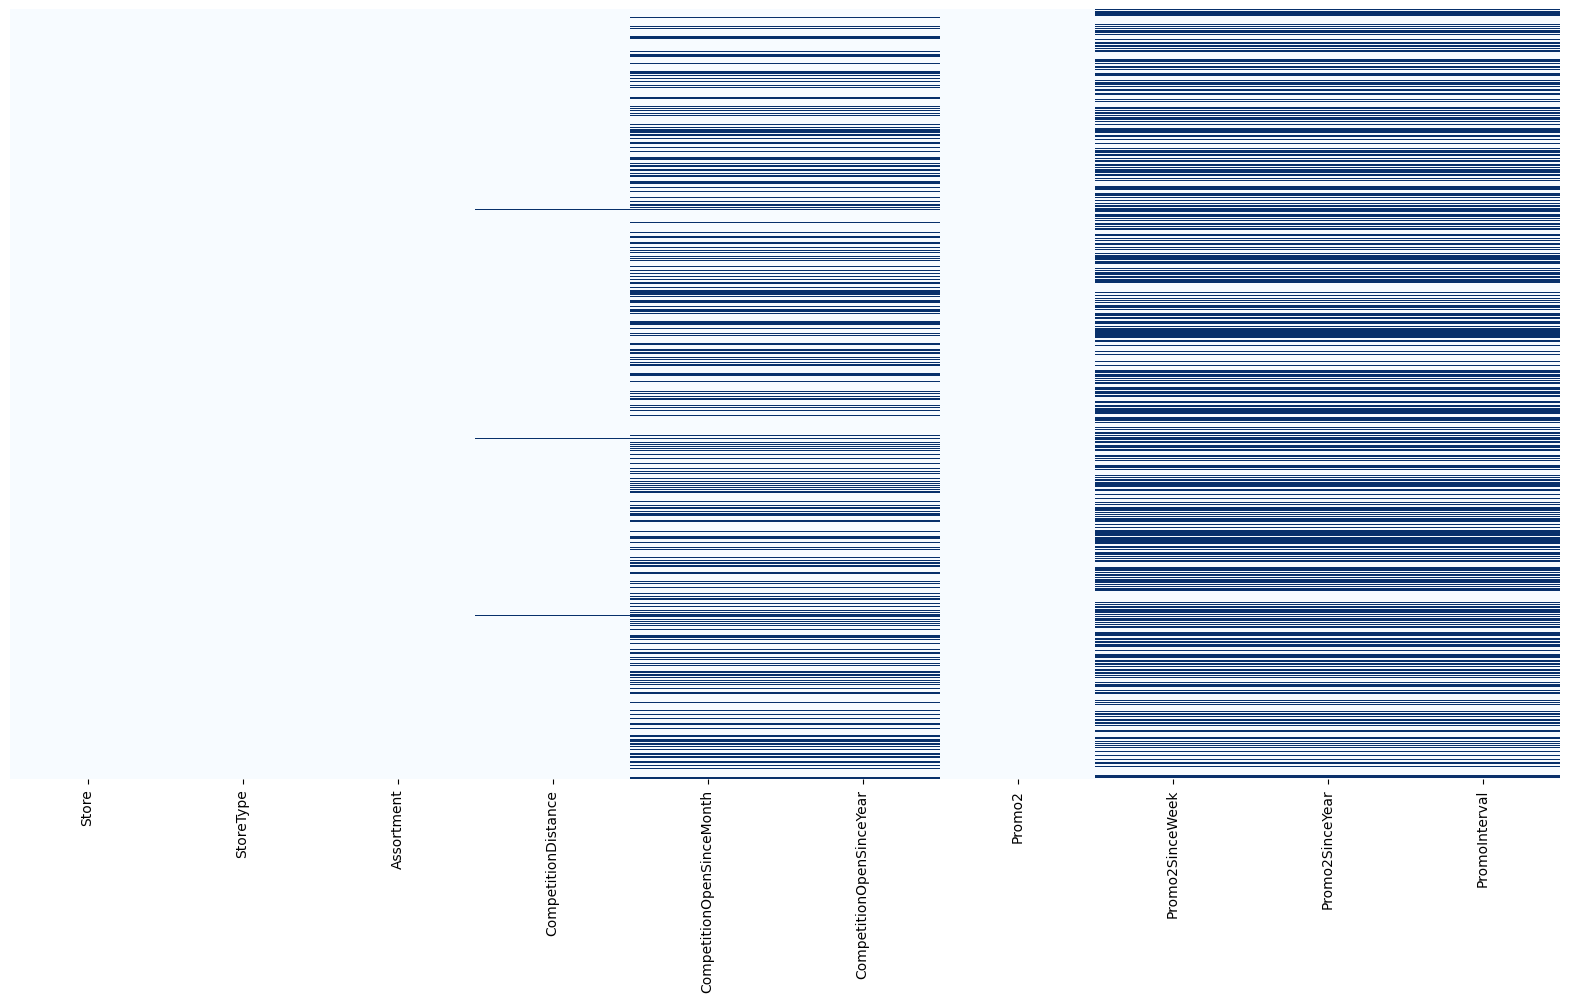

In [30]:
sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()


In [31]:
store_info_df[store_info_df["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,"1,070.00",NaN,NaN,1,13.00,"2,010.00","Jan,Apr,Jul,Oct"
12,13,d,a,310.00,NaN,NaN,1,45.00,"2,009.00","Feb,May,Aug,Nov"
15,16,a,c,"3,270.00",NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,"3,240.00",NaN,NaN,1,22.00,"2,011.00","Mar,Jun,Sept,Dec"
21,22,a,a,"1,040.00",NaN,NaN,1,22.00,"2,012.00","Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,"1,130.00",NaN,NaN,1,10.00,"2,014.00","Mar,Jun,Sept,Dec"
1099,1100,a,a,540.00,NaN,NaN,1,14.00,"2,011.00","Jan,Apr,Jul,Oct"
1112,1113,a,c,"9,260.00",NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.00,NaN,NaN,0,NaN,NaN,NaN


In [32]:
store_info_df[store_info_df["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.00,"2,013.00","Feb,May,Aug,Nov"


In [33]:
store_info_df[store_info_df["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,"1,070.00",NaN,NaN,1,13.00,"2,010.00","Jan,Apr,Jul,Oct"
12,13,d,a,310.00,NaN,NaN,1,45.00,"2,009.00","Feb,May,Aug,Nov"
15,16,a,c,"3,270.00",NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,"3,240.00",NaN,NaN,1,22.00,"2,011.00","Mar,Jun,Sept,Dec"
21,22,a,a,"1,040.00",NaN,NaN,1,22.00,"2,012.00","Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,"1,130.00",NaN,NaN,1,10.00,"2,014.00","Mar,Jun,Sept,Dec"
1099,1100,a,a,540.00,NaN,NaN,1,14.00,"2,011.00","Jan,Apr,Jul,Oct"
1112,1113,a,c,"9,260.00",NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.00,NaN,NaN,0,NaN,NaN,NaN


In [34]:
store_info_df[store_info_df["Promo2"]==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN
3,4,c,c,620.00,9.00,"2,009.00",0,NaN,NaN,NaN
4,5,a,a,"29,910.00",4.00,"2,015.00",0,NaN,NaN,NaN
5,6,a,a,310.00,12.00,"2,013.00",0,NaN,NaN,NaN
6,7,a,c,"24,000.00",4.00,"2,013.00",0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.00,4.00,"2,004.00",0,NaN,NaN,NaN
1109,1110,c,c,900.00,9.00,"2,010.00",0,NaN,NaN,NaN
1111,1112,c,c,"1,880.00",4.00,"2,006.00",0,NaN,NaN,NaN
1112,1113,a,c,"9,260.00",NaN,NaN,0,NaN,NaN,NaN


In [35]:
store_info_df[store_info_df["Promo2SinceWeek"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN
3,4,c,c,620.00,9.00,"2,009.00",0,NaN,NaN,NaN
4,5,a,a,"29,910.00",4.00,"2,015.00",0,NaN,NaN,NaN
5,6,a,a,310.00,12.00,"2,013.00",0,NaN,NaN,NaN
6,7,a,c,"24,000.00",4.00,"2,013.00",0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.00,4.00,"2,004.00",0,NaN,NaN,NaN
1109,1110,c,c,900.00,9.00,"2,010.00",0,NaN,NaN,NaN
1111,1112,c,c,"1,880.00",4.00,"2,006.00",0,NaN,NaN,NaN
1112,1113,a,c,"9,260.00",NaN,NaN,0,NaN,NaN,NaN


In [36]:
store_info_df[store_info_df["Promo2SinceYear"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,"1,270.00",9.00,"2,008.00",0,NaN,NaN,NaN
3,4,c,c,620.00,9.00,"2,009.00",0,NaN,NaN,NaN
4,5,a,a,"29,910.00",4.00,"2,015.00",0,NaN,NaN,NaN
5,6,a,a,310.00,12.00,"2,013.00",0,NaN,NaN,NaN
6,7,a,c,"24,000.00",4.00,"2,013.00",0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.00,4.00,"2,004.00",0,NaN,NaN,NaN
1109,1110,c,c,900.00,9.00,"2,010.00",0,NaN,NaN,NaN
1111,1112,c,c,"1,880.00",4.00,"2,006.00",0,NaN,NaN,NaN
1112,1113,a,c,"9,260.00",NaN,NaN,0,NaN,NaN,NaN


In [37]:
str_columns = ["PromoInterval", "CompetitionOpenSinceYear", "CompetitionOpenSinceMonth", "Promo2SinceWeek", "Promo2SinceYear"]

In [38]:
for str in str_columns:
    store_info_df[str] = store_info_df[str].fillna(0).infer_objects(copy=False)

In [39]:
store_info_df["CompetitionDistance"] = store_info_df["CompetitionDistance"].fillna(store_info_df["CompetitionDistance"].mean())

In [40]:
store_info_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

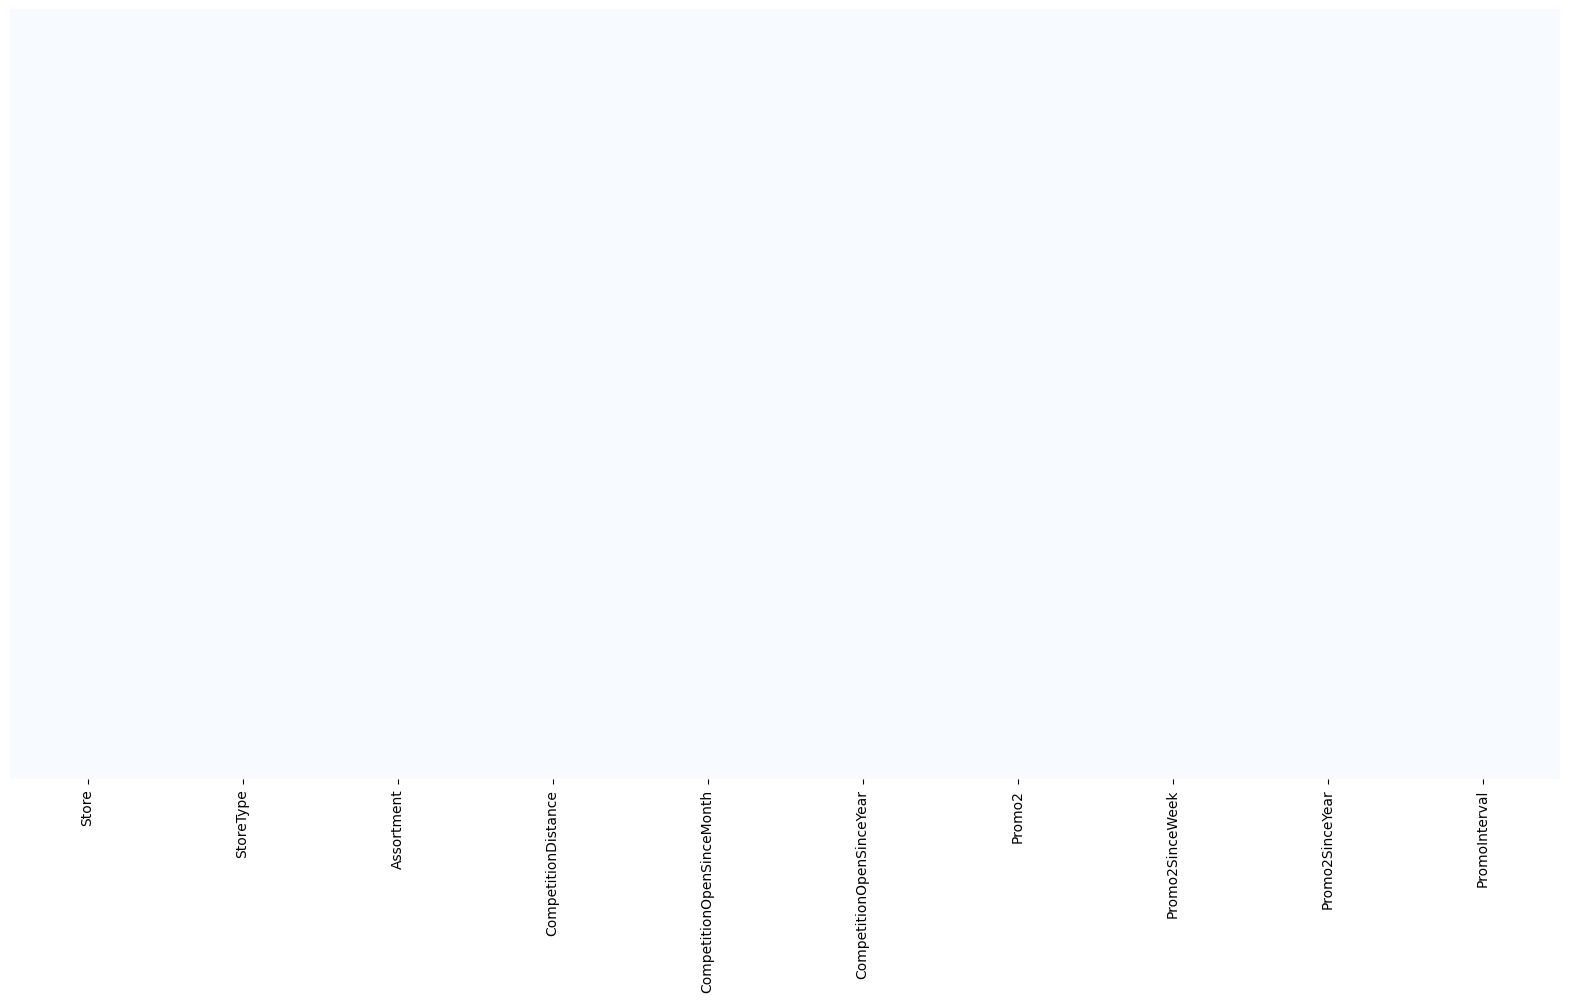

In [41]:
sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()


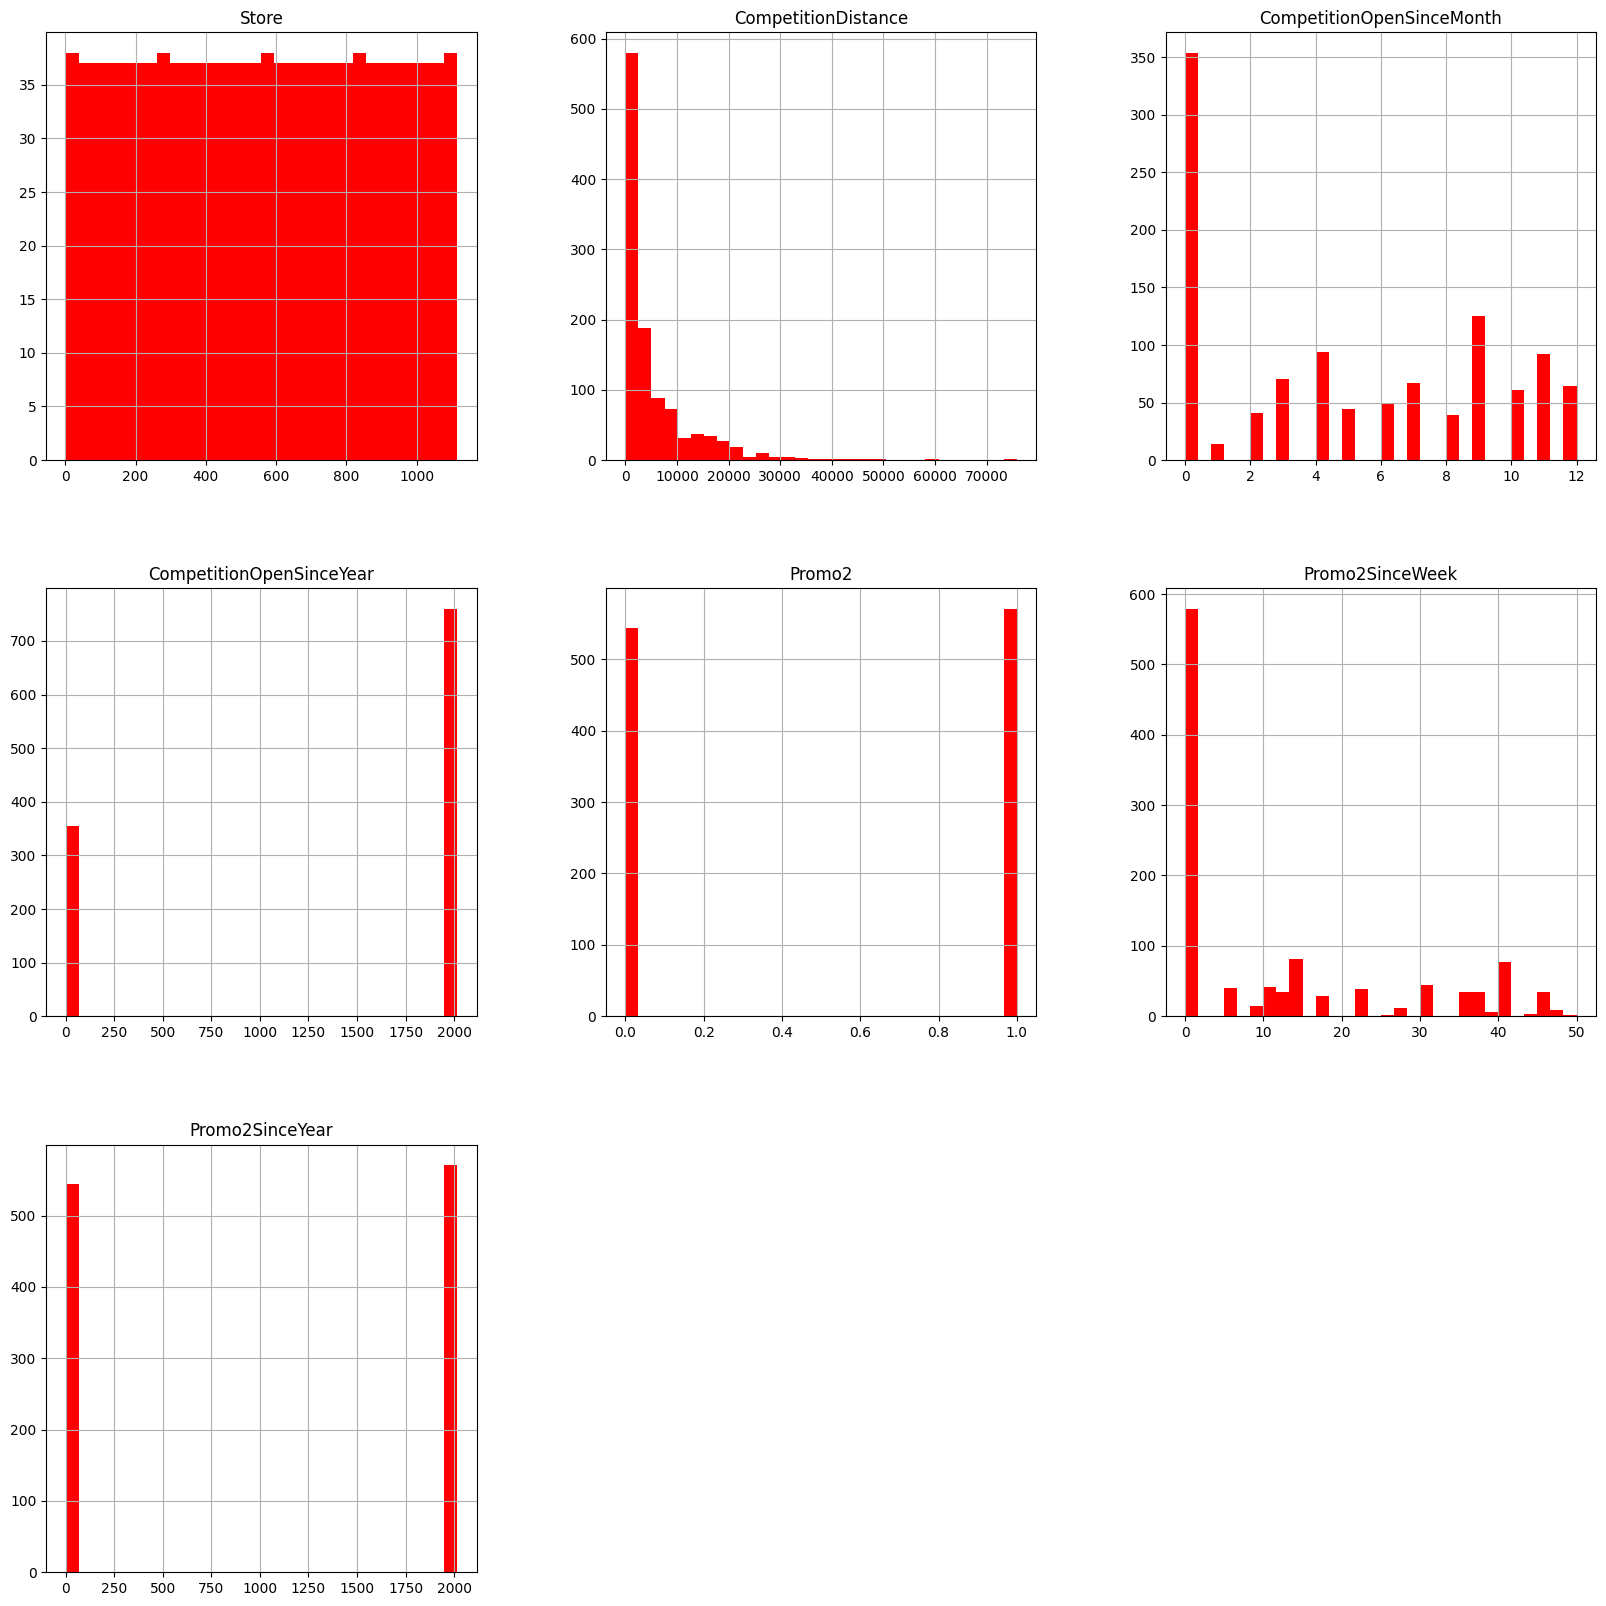

In [42]:
store_info_df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()


In [43]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = "inner", on = "Store")

In [44]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,"1,270.00",9.00,"2,008.00",0,0.00,0.00,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.00,11.00,"2,007.00",1,13.00,"2,010.00","Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,"14,130.00",12.00,"2,006.00",1,14.00,"2,011.00","Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.00,9.00,"2,009.00",0,0.00,0.00,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,"29,910.00",4.00,"2,015.00",0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.00,9.00,"2,006.00",0,0.00,0.00,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.00,10.00,"1,999.00",0,0.00,0.00,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.00,0.00,0.00,1,48.00,"2,012.00","Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,"1,430.00",0.00,0.00,0,0.00,0.00,0


In [45]:
sales_train_all_df.to_csv("merged_test.csv", index=False)

In [46]:
sales_train_all_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,"1,270.00",9.00,"2,008.00",0,0.00,0.00,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.00,11.00,"2,007.00",1,13.00,"2,010.00","Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,"14,130.00",12.00,"2,006.00",1,14.00,"2,011.00","Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.00,9.00,"2,009.00",0,0.00,0.00,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,"29,910.00",4.00,"2,015.00",0,0.00,0.00,0


In [47]:
sales_train_all_df.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.00,9.00,"2,006.00",0,0.00,0.00,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.00,10.00,"1,999.00",0,0.00,0.00,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.00,0.00,0.00,1,48.00,"2,012.00","Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,"1,430.00",0.00,0.00,0,0.00,0.00,0
844391,1097,2,2013-01-01,5961,1405,0,a,1,b,b,720.00,3.00,"2,002.00",0,0.00,0.00,0


In [48]:
correlations_sales = sales_train_all_df.corr(numeric_only=True)["Sales"].sort_values()

In [49]:
correlations_sales

DayOfWeek                   -0.18
Promo2SinceYear             -0.13
Promo2                      -0.13
Promo2SinceWeek             -0.06
CompetitionDistance         -0.04
CompetitionOpenSinceMonth   -0.02
CompetitionOpenSinceYear     0.01
Store                        0.01
SchoolHoliday                0.04
Promo                        0.37
Customers                    0.82
Sales                        1.00
Name: Sales, dtype: float64

In [50]:
correlations = sales_train_all_df.corr(numeric_only=True)

In [51]:
correlations

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.00,0.00,0.01,0.03,-0.00,0.00,-0.03,-0.03,-0.01,0.01,0.01,0.01
DayOfWeek,0.00,1.00,-0.18,-0.10,-0.29,-0.14,0.01,-0.00,-0.00,-0.00,-0.00,-0.00
Sales,0.01,-0.18,1.00,0.82,0.37,0.04,-0.04,-0.02,0.01,-0.13,-0.06,-0.13
Customers,0.03,-0.10,0.82,1.00,0.18,0.02,-0.15,-0.02,0.00,-0.20,-0.13,-0.20
Promo,-0.00,-0.29,0.37,0.18,1.00,0.03,-0.00,0.00,0.00,-0.00,-0.00,-0.00
SchoolHoliday,0.00,-0.14,0.04,0.02,0.03,1.00,-0.00,-0.00,0.00,-0.01,-0.01,-0.01
CompetitionDistance,-0.03,0.01,-0.04,-0.15,-0.00,-0.00,1.00,-0.03,-0.00,-0.14,-0.12,-0.14
CompetitionOpenSinceMonth,-0.03,-0.00,-0.02,-0.02,0.00,-0.00,-0.03,1.00,0.79,-0.08,-0.11,-0.08
CompetitionOpenSinceYear,-0.01,-0.00,0.01,0.00,0.00,0.00,-0.00,0.79,1.00,-0.10,-0.13,-0.10
Promo2,0.01,-0.00,-0.13,-0.20,-0.00,-0.01,-0.14,-0.08,-0.10,1.00,0.76,1.00


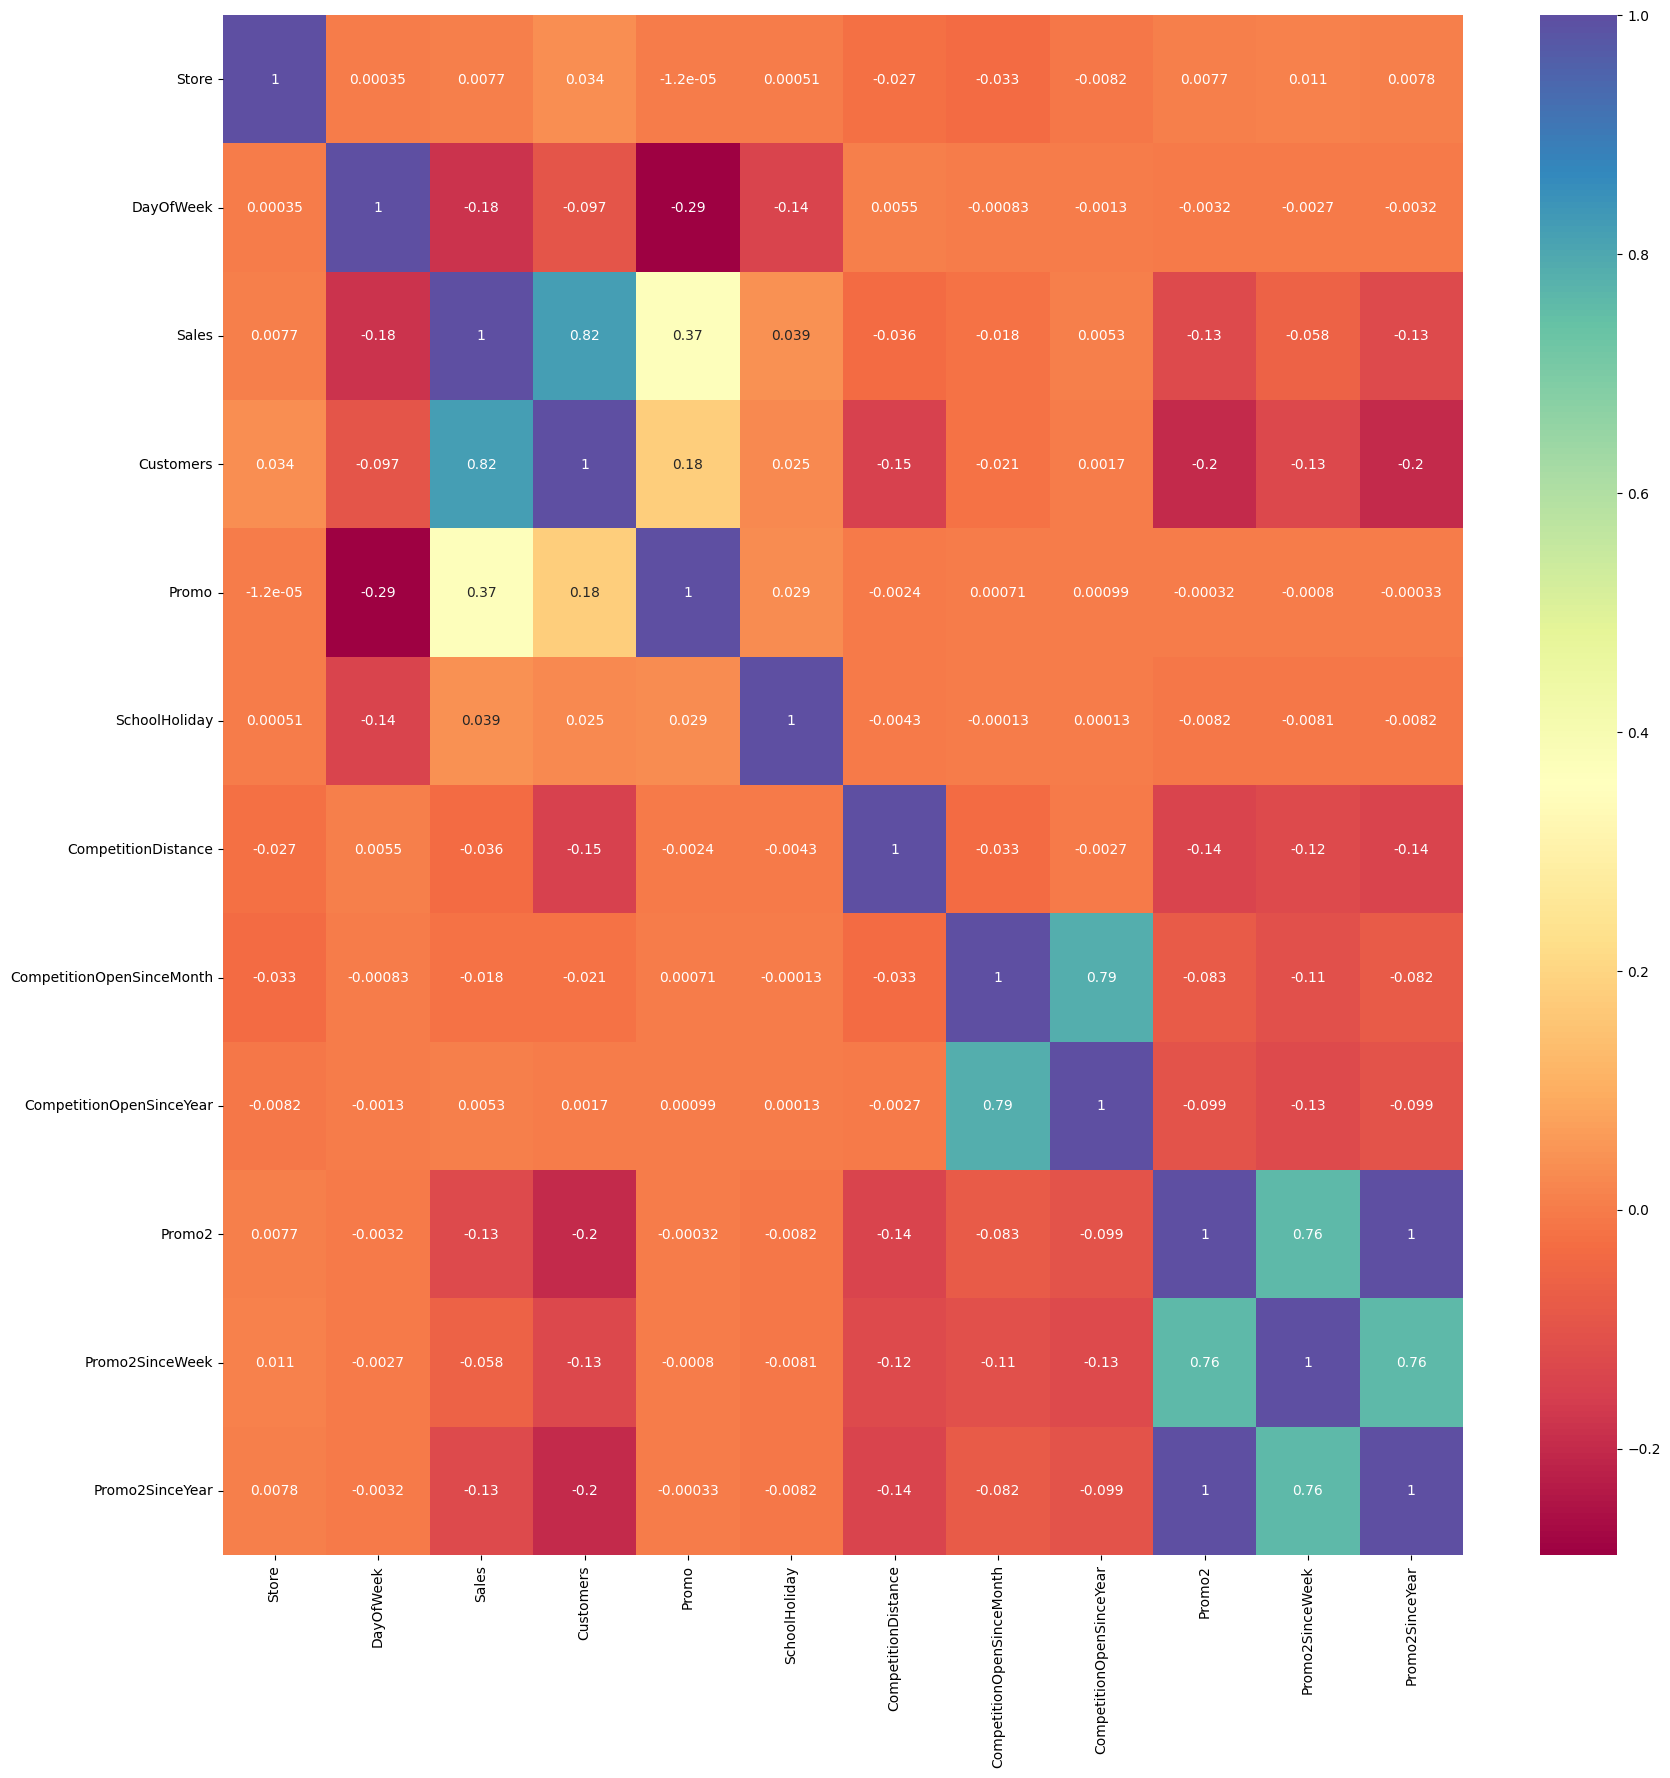

In [52]:
fig, axis = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True, cmap="Spectral")
plt.show()


In [53]:
sales_train_all_df["Year"] = pd.DatetimeIndex(sales_train_all_df["Date"]).year

In [54]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,"1,270.00",9.00,"2,008.00",0,0.00,0.00,0,2015
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.00,11.00,"2,007.00",1,13.00,"2,010.00","Jan,Apr,Jul,Oct",2015
2,3,5,2015-07-31,8314,821,1,0,1,a,a,"14,130.00",12.00,"2,006.00",1,14.00,"2,011.00","Jan,Apr,Jul,Oct",2015
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.00,9.00,"2,009.00",0,0.00,0.00,0,2015
4,5,5,2015-07-31,4822,559,1,0,1,a,a,"29,910.00",4.00,"2,015.00",0,0.00,0.00,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.00,9.00,"2,006.00",0,0.00,0.00,0,2013
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.00,10.00,"1,999.00",0,0.00,0.00,0,2013
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.00,0.00,0.00,1,48.00,"2,012.00","Jan,Apr,Jul,Oct",2013
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,"1,430.00",0.00,0.00,0,0.00,0.00,0,2013


In [55]:
sales_train_all_df["Month"] = pd.DatetimeIndex(sales_train_all_df["Date"]).month

In [56]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,2015-07-31,5263,555,1,0,1,c,a,"1,270.00",9.00,"2,008.00",0,0.00,0.00,0,2015,7
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.00,11.00,"2,007.00",1,13.00,"2,010.00","Jan,Apr,Jul,Oct",2015,7
2,3,5,2015-07-31,8314,821,1,0,1,a,a,"14,130.00",12.00,"2,006.00",1,14.00,"2,011.00","Jan,Apr,Jul,Oct",2015,7
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.00,9.00,"2,009.00",0,0.00,0.00,0,2015,7
4,5,5,2015-07-31,4822,559,1,0,1,a,a,"29,910.00",4.00,"2,015.00",0,0.00,0.00,0,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.00,9.00,"2,006.00",0,0.00,0.00,0,2013,1
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.00,10.00,"1,999.00",0,0.00,0.00,0,2013,1
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.00,0.00,0.00,1,48.00,"2,012.00","Jan,Apr,Jul,Oct",2013,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,"1,430.00",0.00,0.00,0,0.00,0.00,0,2013,1


In [57]:
sales_train_all_df["Day"] = pd.DatetimeIndex(sales_train_all_df["Date"]).day

In [58]:
sales_train_all_df["Year"].unique()

array([2015, 2014, 2013])

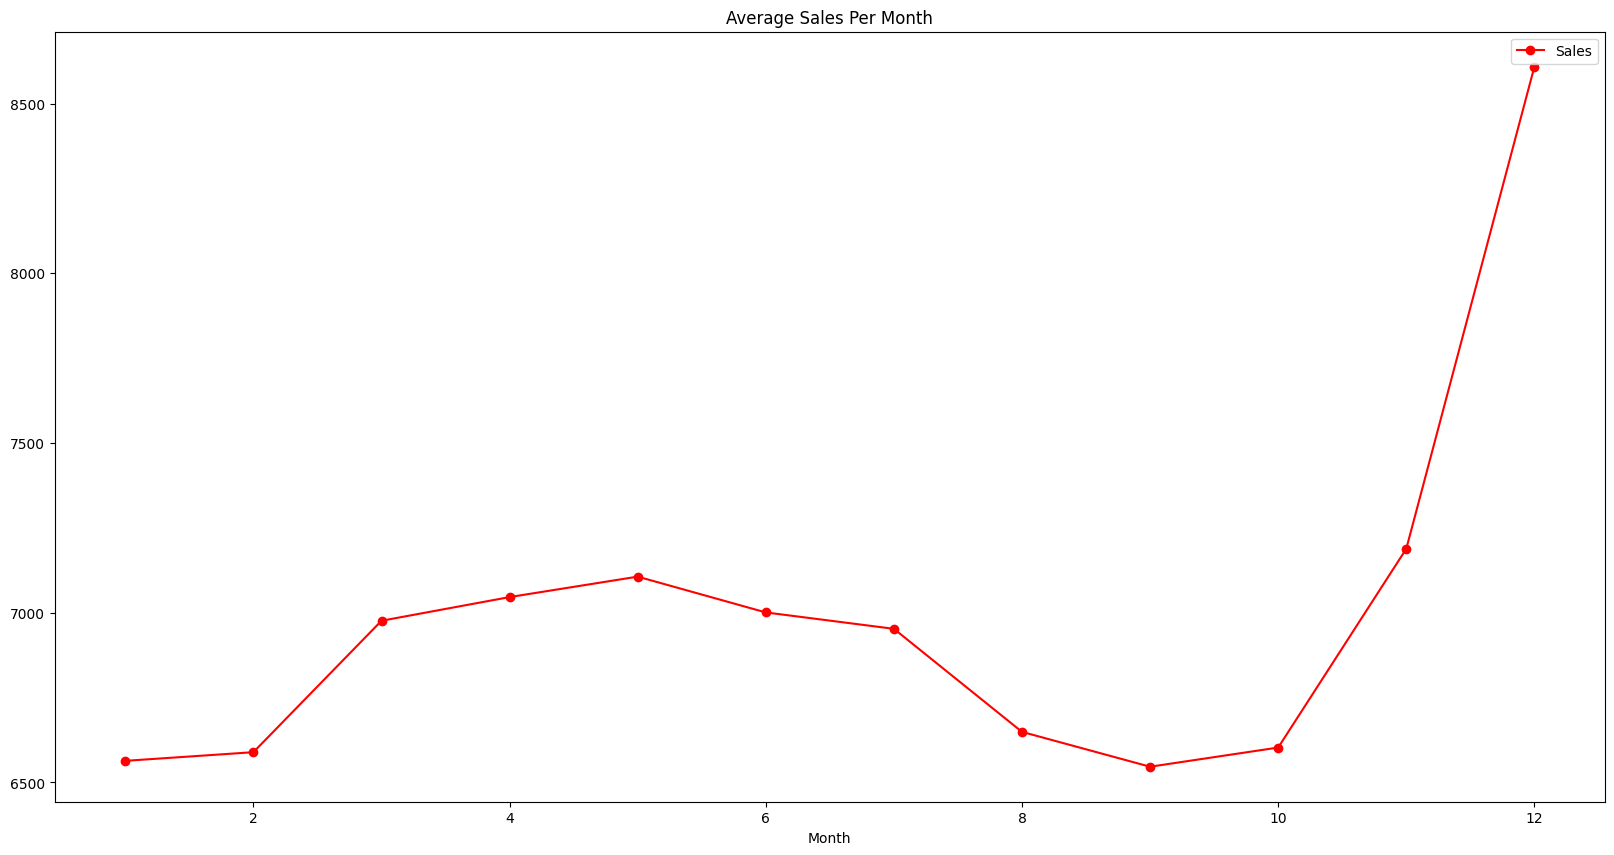

In [59]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (20,10), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')
plt.show()


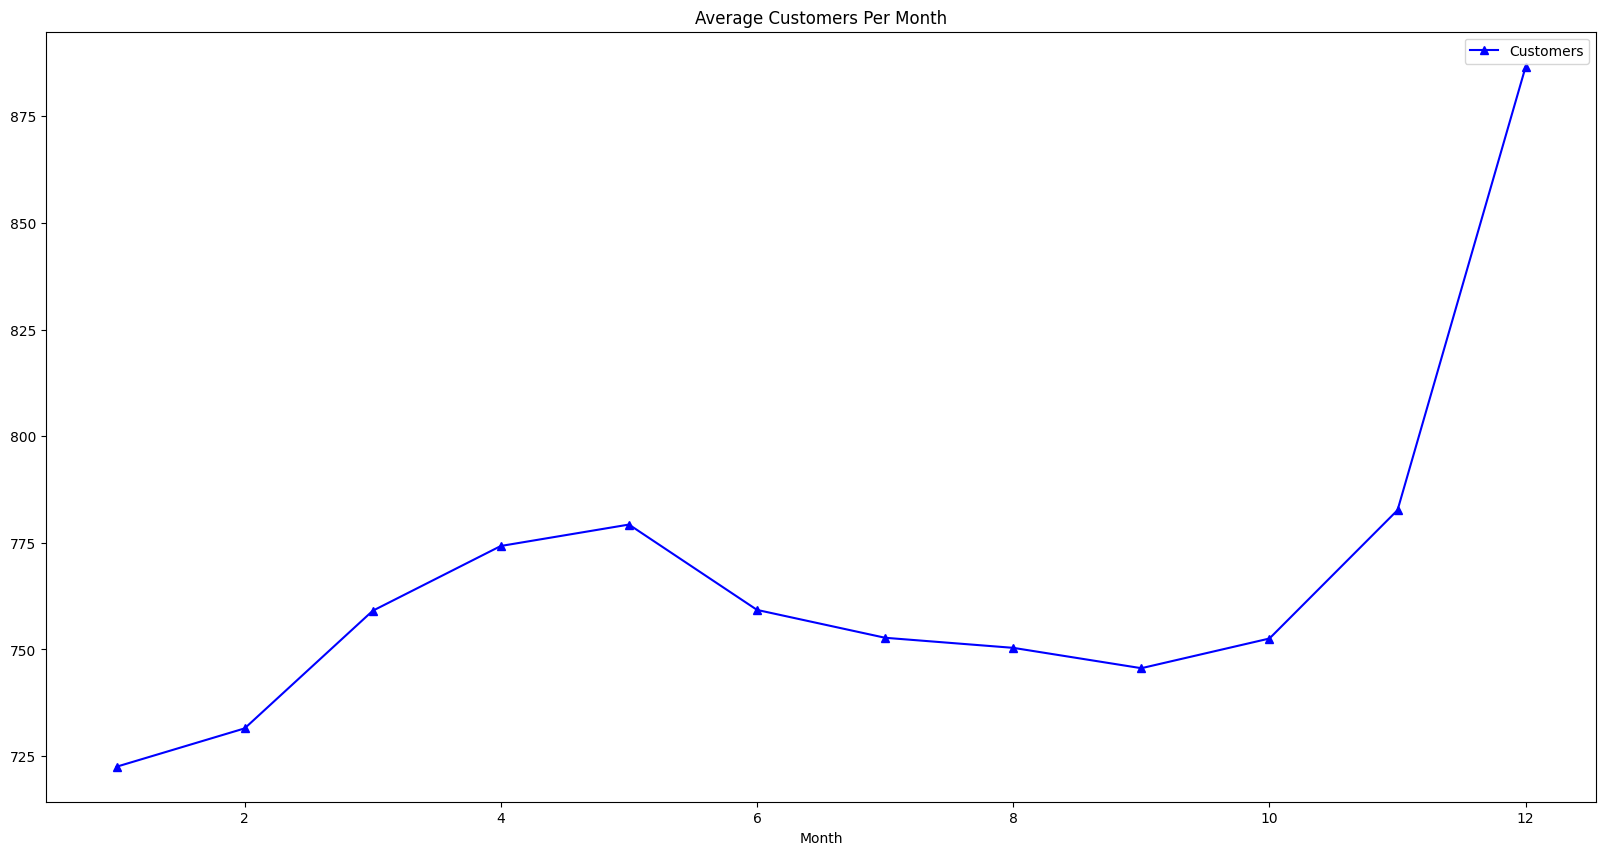

In [60]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (20,10), marker = '^', color = 'b')
axis.set_title('Average Customers Per Month')
plt.show()


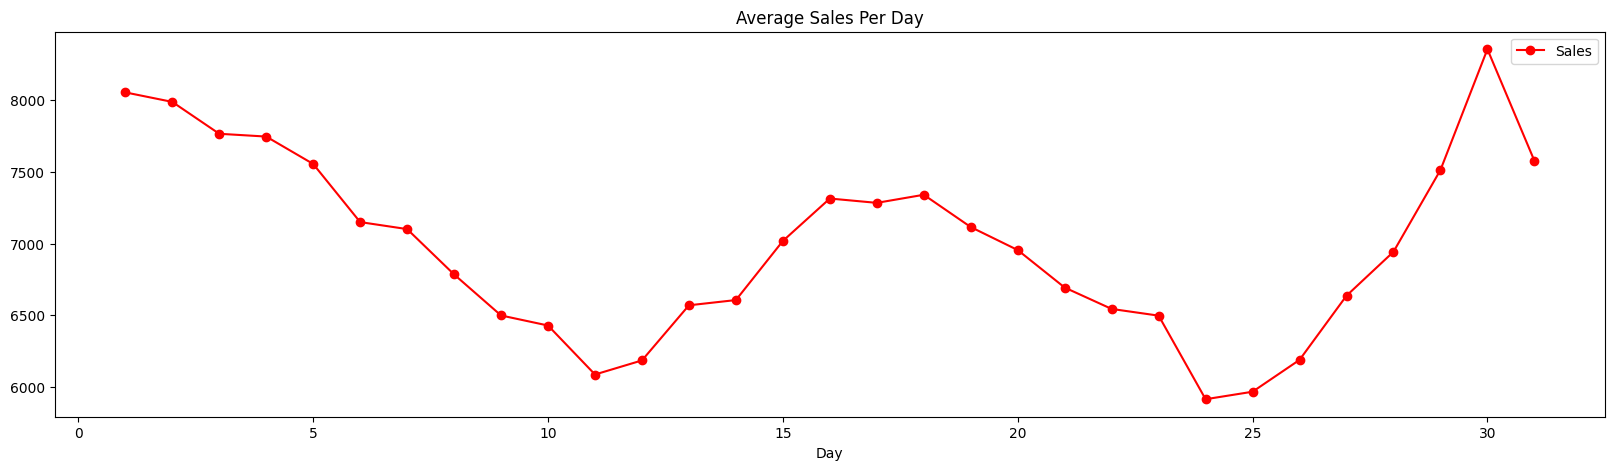

In [61]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (20,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')
plt.show()

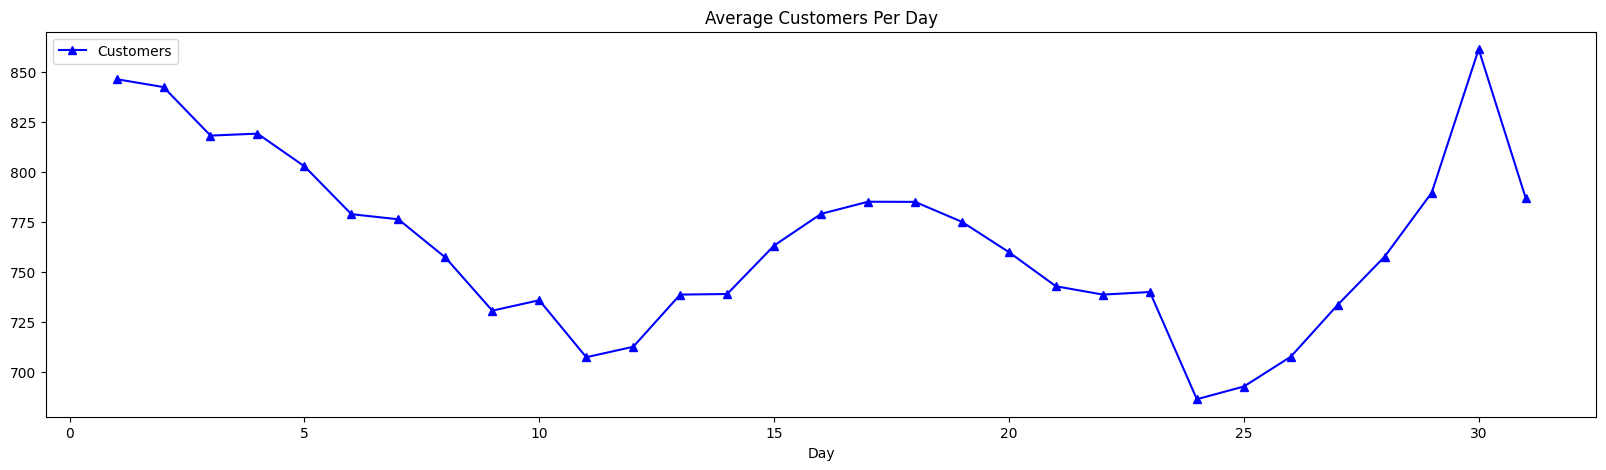

In [62]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (20,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day')
plt.show()


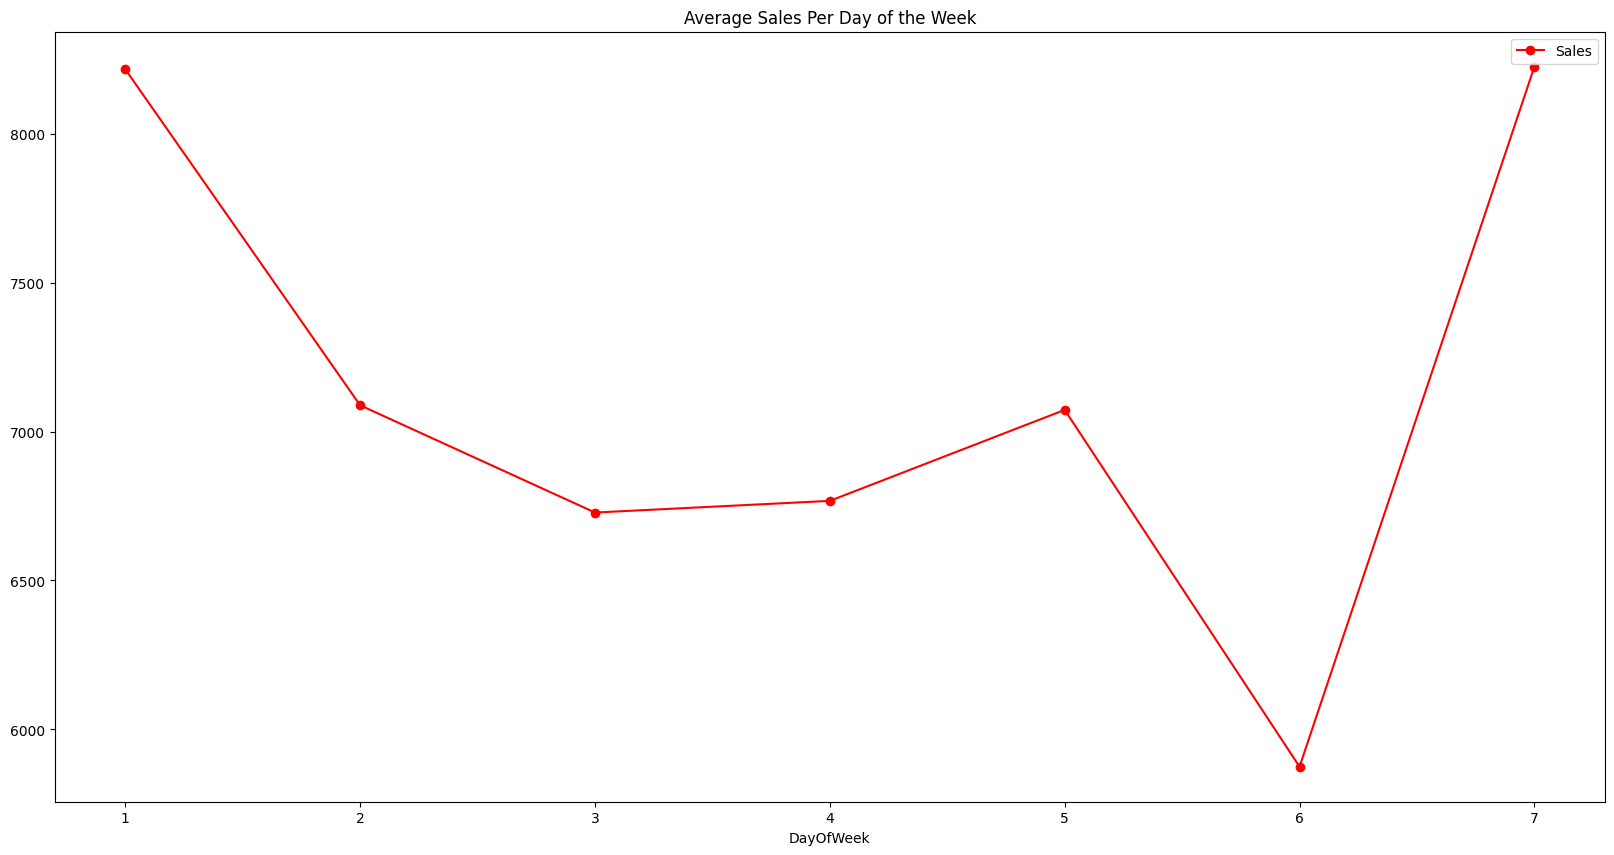

In [63]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (20,10), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')
plt.show()

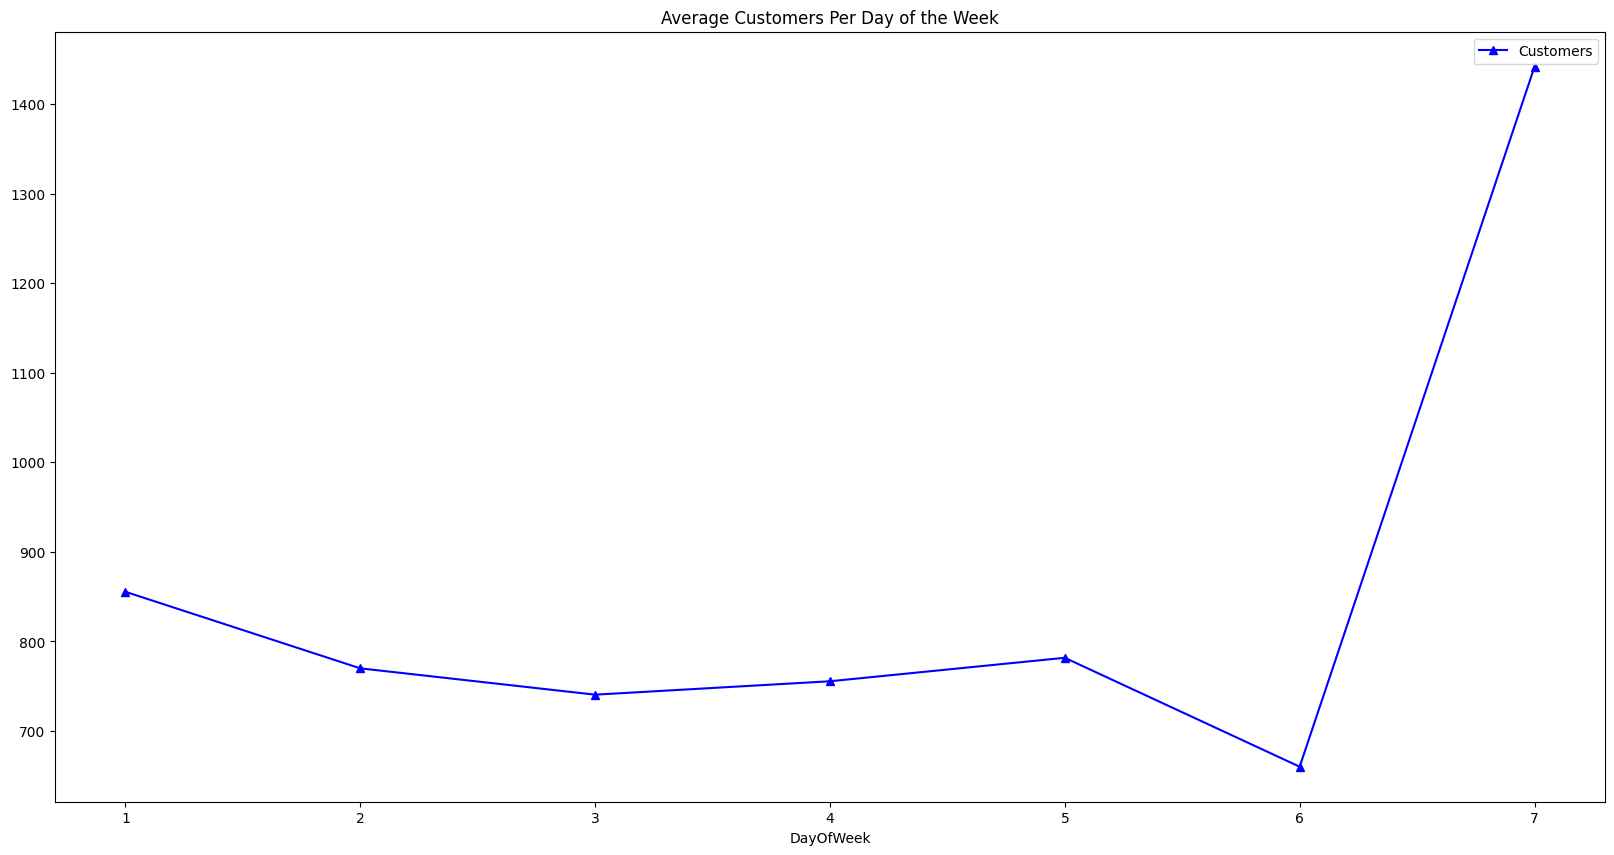

In [64]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (20,10), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day of the Week')
plt.show()


In [65]:
sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'])

In [66]:
sales_train_all_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int32
Month                                 int32
Day                                   int32
dtype: object

In [67]:
sales_train_all_df["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [68]:
sales_train_all_df['StoreType'] = sales_train_all_df['StoreType'].astype('category')

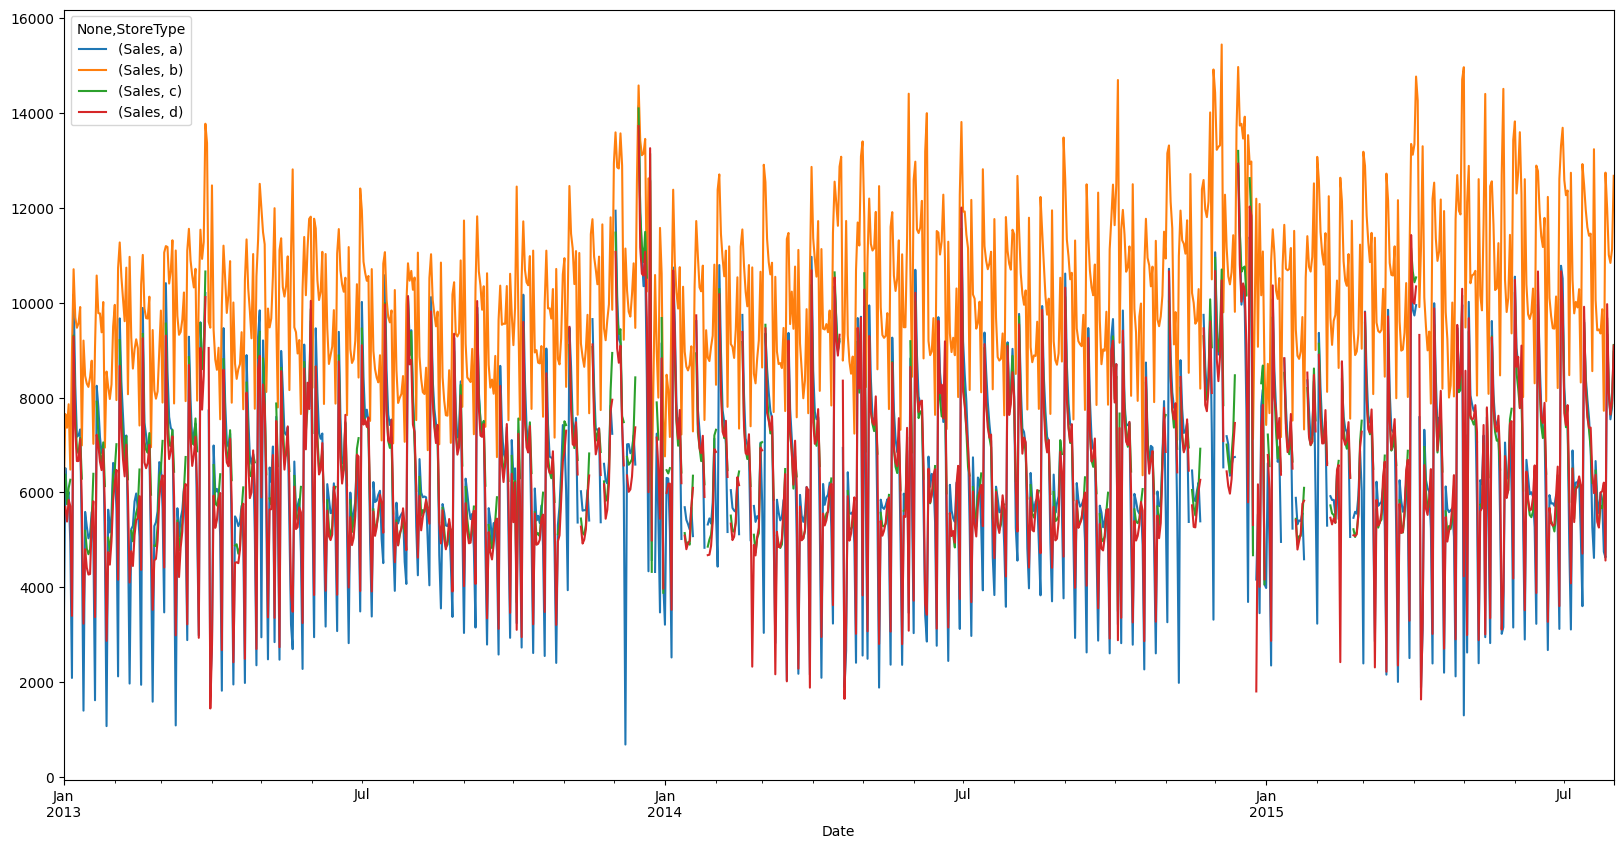

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
sales_train_all_df.groupby(['Date', 'StoreType'], observed=False).agg({'Sales': 'mean'}).unstack().plot(ax=ax)
plt.show()

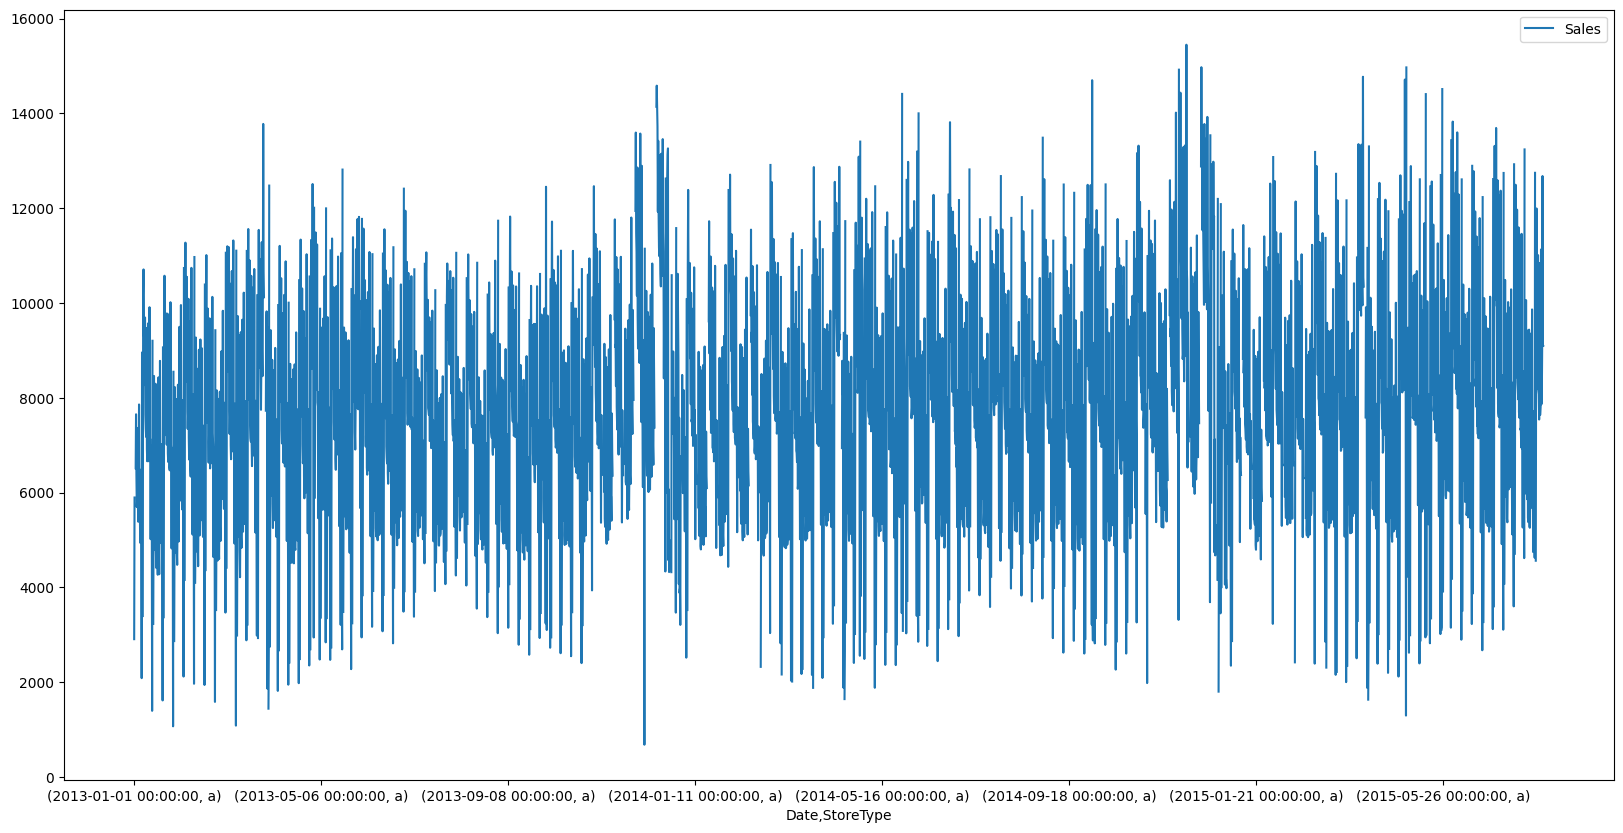

In [70]:
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date','StoreType'], observed=False).agg({'Sales': 'mean'}).plot(ax=ax)
plt.show()


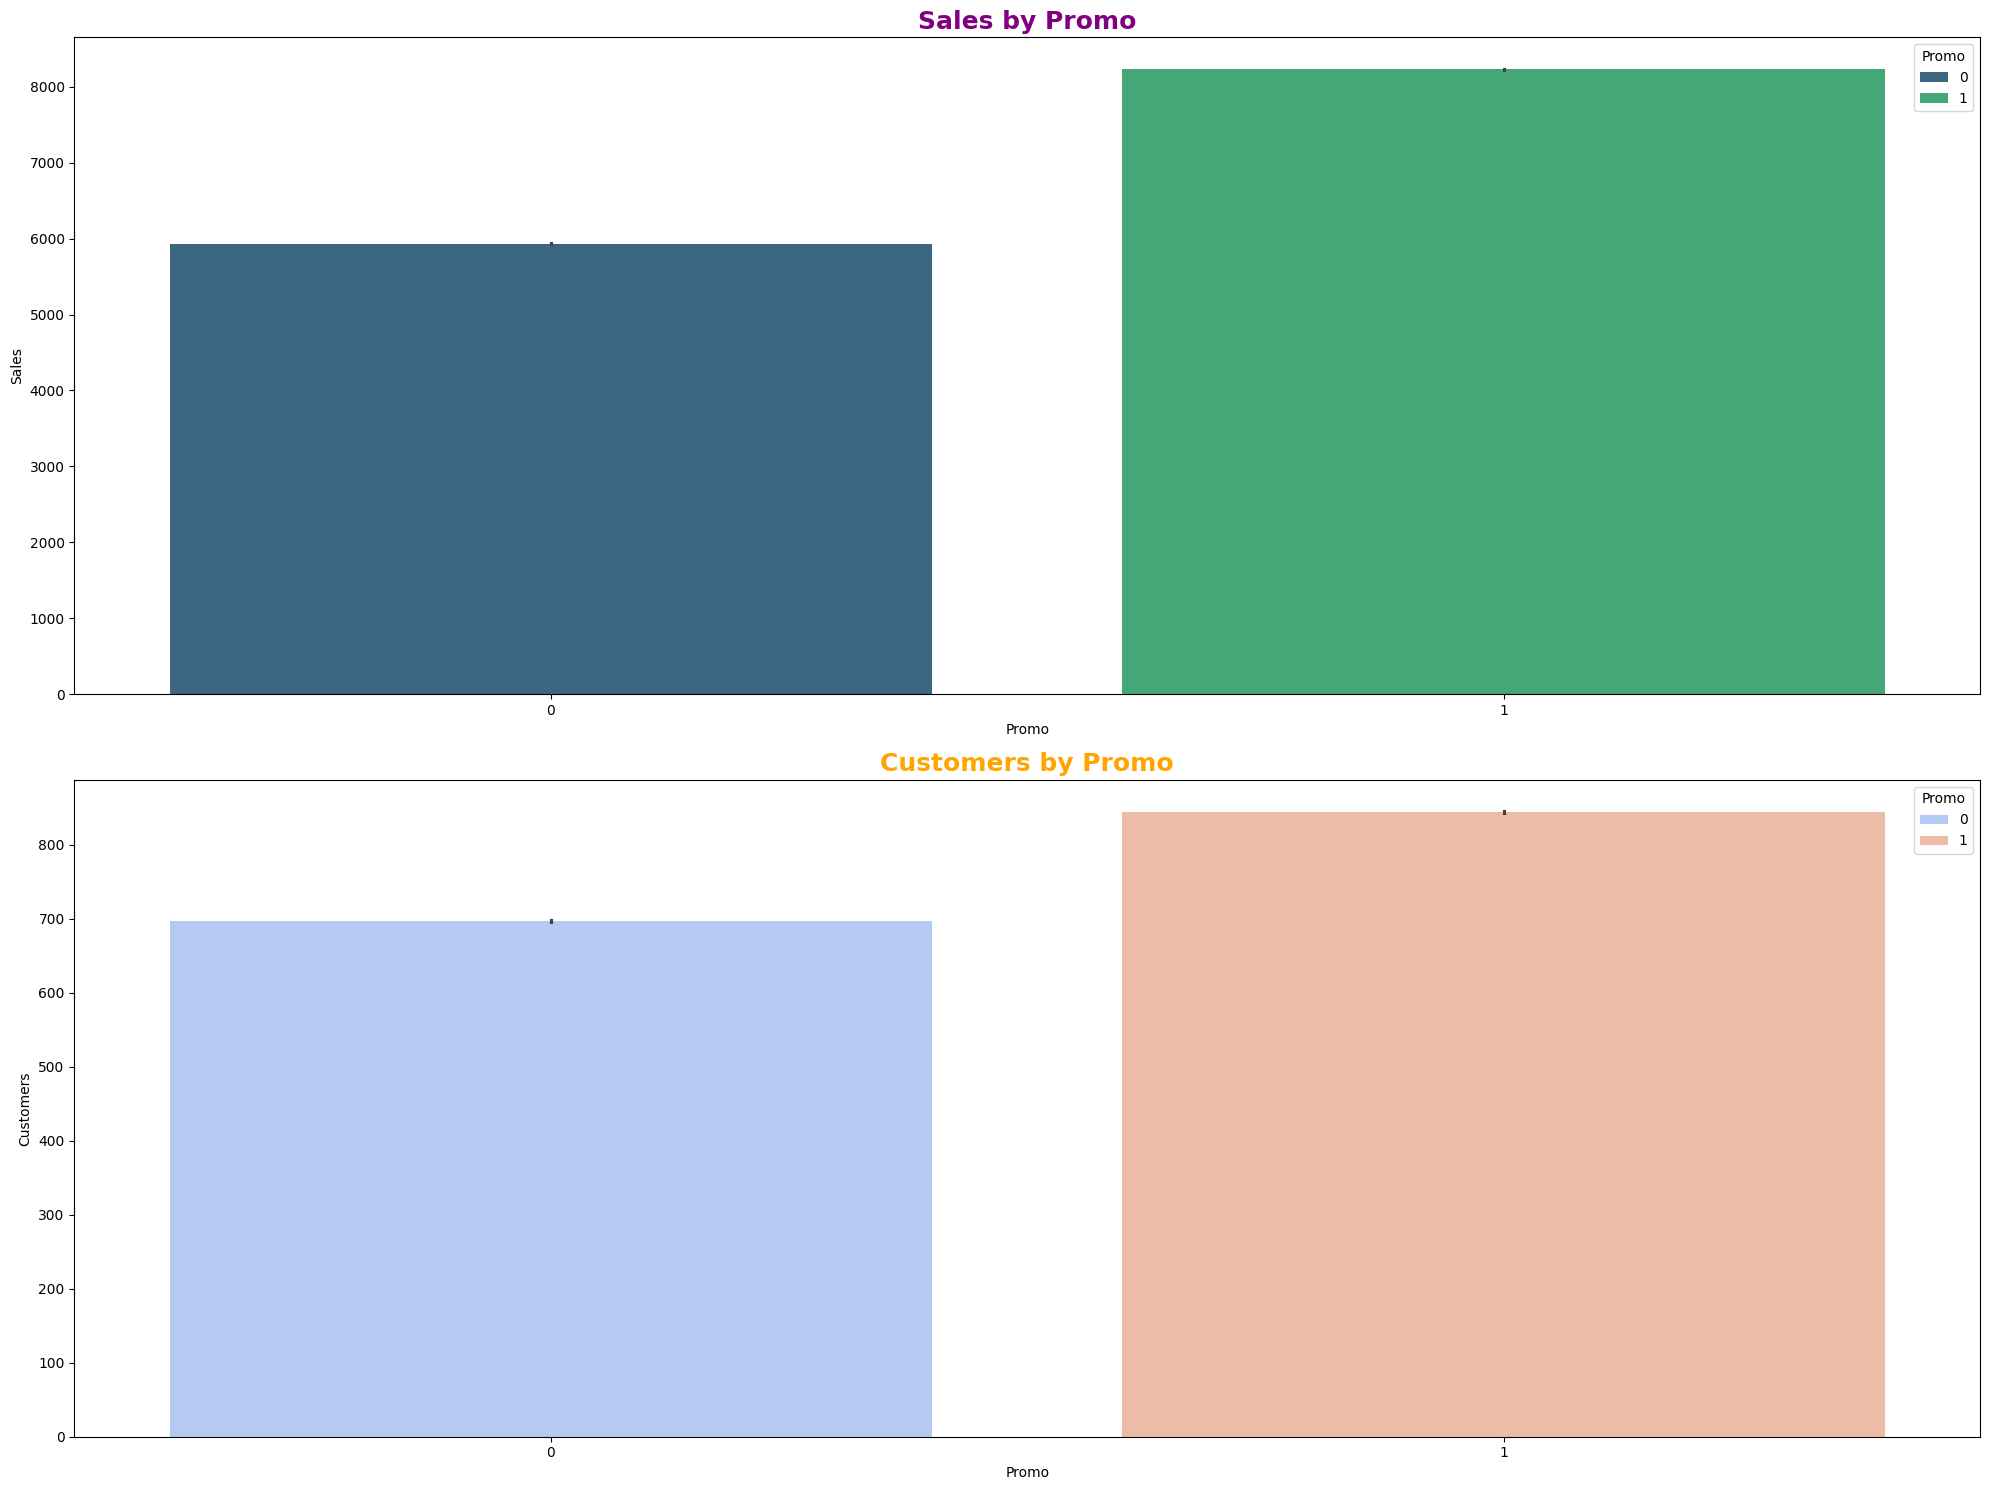

In [71]:
plt.figure(figsize=[20, 15])

plt.subplot(2, 1, 1)
sns.barplot(x='Promo', y='Sales', data=sales_train_all_df, hue='Promo', palette='viridis')
plt.title('Sales by Promo', fontsize=18, fontweight='bold', color='purple')

plt.subplot(2, 1, 2)
sns.barplot(x='Promo', y='Customers', data=sales_train_all_df, hue='Promo', palette='coolwarm')
plt.title('Customers by Promo', fontsize=18, fontweight='bold', color='orange')

plt.tight_layout()
plt.show()

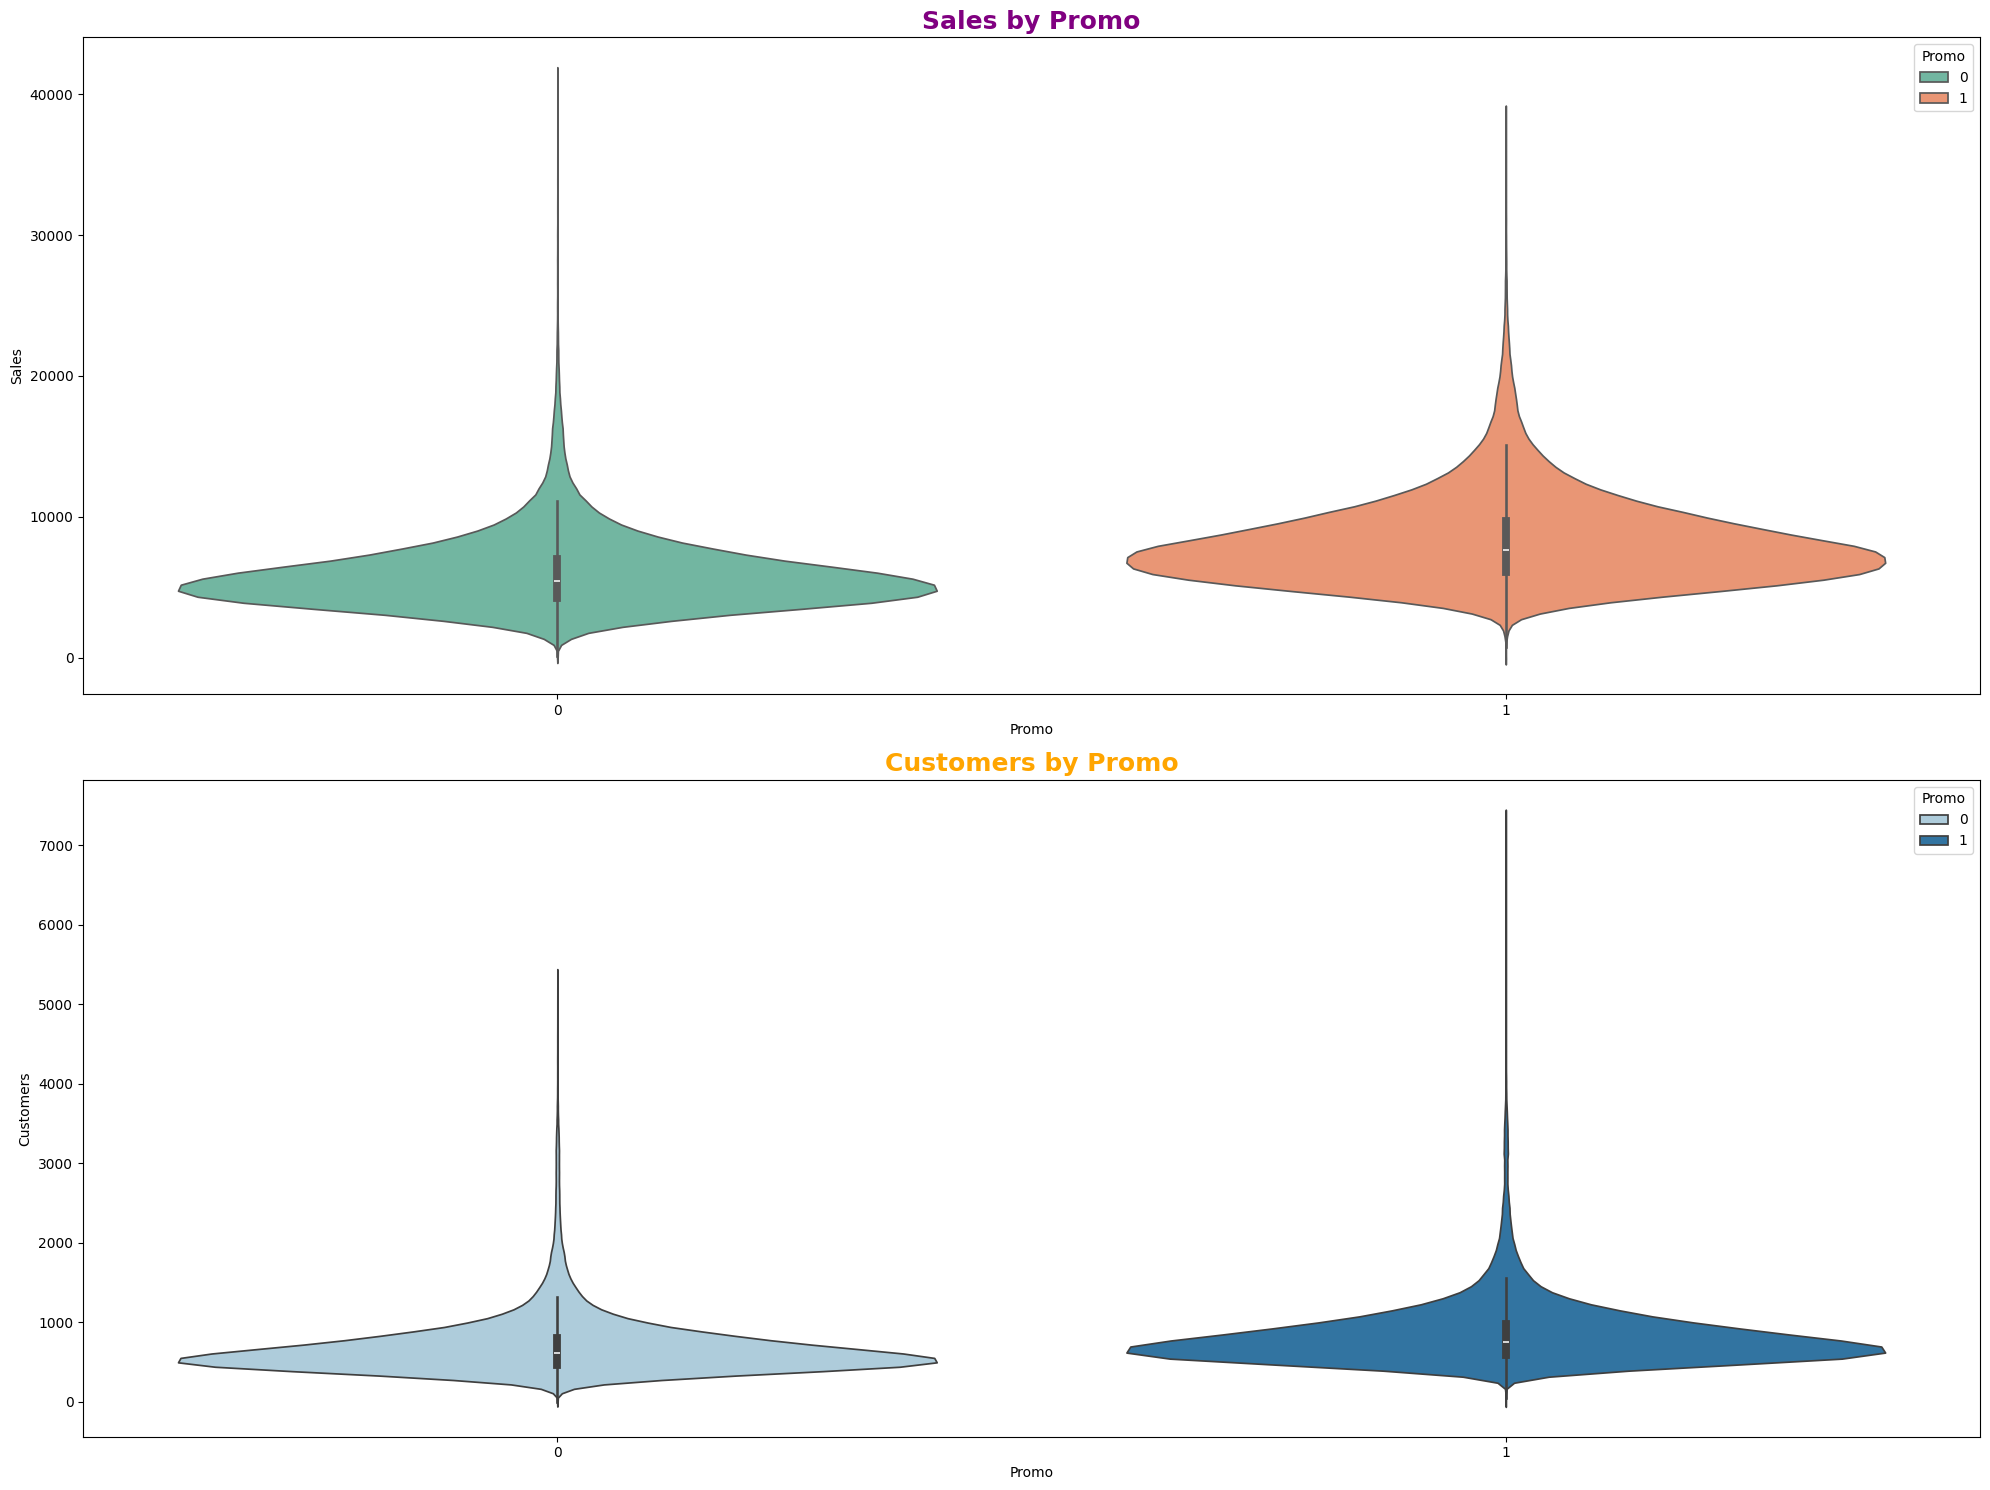

In [72]:
plt.figure(figsize=[20, 15])

plt.subplot(211)
sns.violinplot(x='Promo', y='Sales', data=sales_train_all_df, hue="Promo", palette='Set2')
plt.title('Sales by Promo', fontsize=18, fontweight='bold', color='purple')

plt.subplot(212)
sns.violinplot(x='Promo', y='Customers', data=sales_train_all_df, hue="Promo", palette='Paired')
plt.title('Customers by Promo', fontsize=18, fontweight='bold', color='orange')

plt.tight_layout()
plt.show()

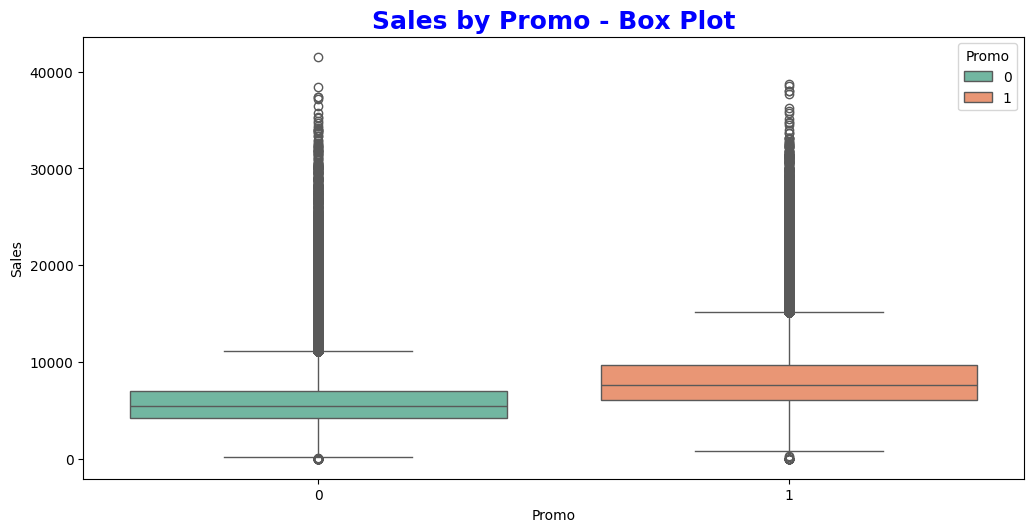

In [73]:
plt.subplot(222)
sns.boxplot(x='Promo', y='Sales', data=sales_train_all_df, hue="Promo", palette='Set2')
plt.title('Sales by Promo - Box Plot', fontsize=18, fontweight='bold', color='blue')

plt.tight_layout()
plt.show()

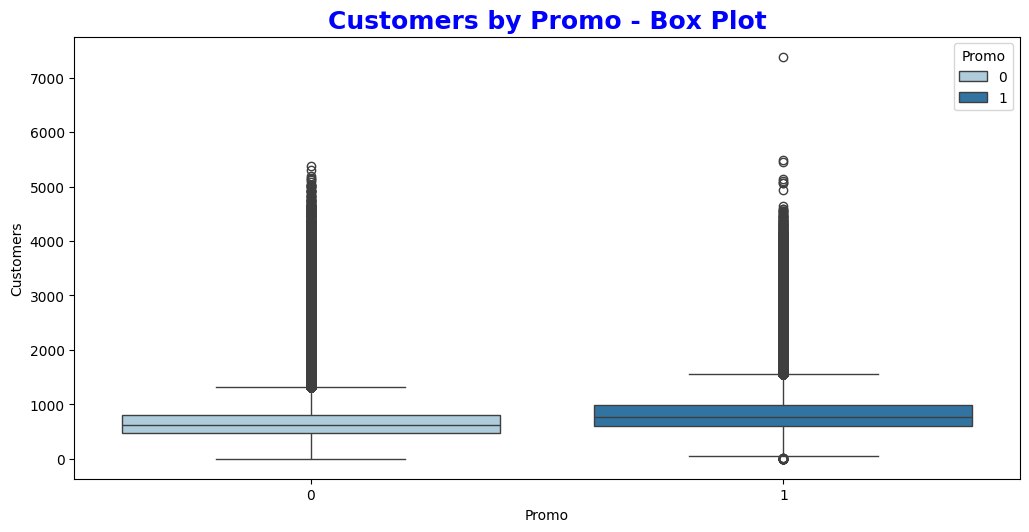

In [74]:
plt.subplot(222)
sns.boxplot(x='Promo', y='Customers', data=sales_train_all_df, hue="Promo", palette='Paired')
plt.title('Customers by Promo - Box Plot', fontsize=18, fontweight='bold', color='blue')
plt.tight_layout()
plt.show()

In [75]:
from prophet import Prophet

In [76]:
def sales_predcition(Store_id, sales_df, peiords):
    sales_df = sales_df[sales_df["Store"] == Store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values("ds")
    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods=peiords)
    forecast = model.predict(future)
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].rename(columns={'ds': 'Date','yhat': 'Predicted Sales','yhat_lower': 'Lower Bound','yhat_upper': 'Upper Bound'}))
    figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2  = model.plot_components(forecast)


10:22:46 - cmdstanpy - INFO - Chain [1] start processing
10:22:46 - cmdstanpy - INFO - Chain [1] done processing


          Date  Predicted Sales  Lower Bound  Upper Bound
0   2013-01-02         5,154.18     4,160.01     6,194.79
1   2013-01-03         5,106.06     4,037.89     6,157.03
2   2013-01-04         5,290.06     4,215.34     6,377.73
3   2013-01-05         4,443.38     3,315.58     5,507.12
4   2013-01-07         6,065.04     4,936.61     7,113.72
..         ...              ...          ...          ...
839 2015-09-25         6,019.56     5,056.37     7,052.17
840 2015-09-26         5,253.90     4,240.23     6,235.00
841 2015-09-27         5,794.17     4,666.84     6,836.42
842 2015-09-28         7,012.77     5,928.38     8,042.27
843 2015-09-29         6,230.26     5,254.63     7,235.49

[844 rows x 4 columns]


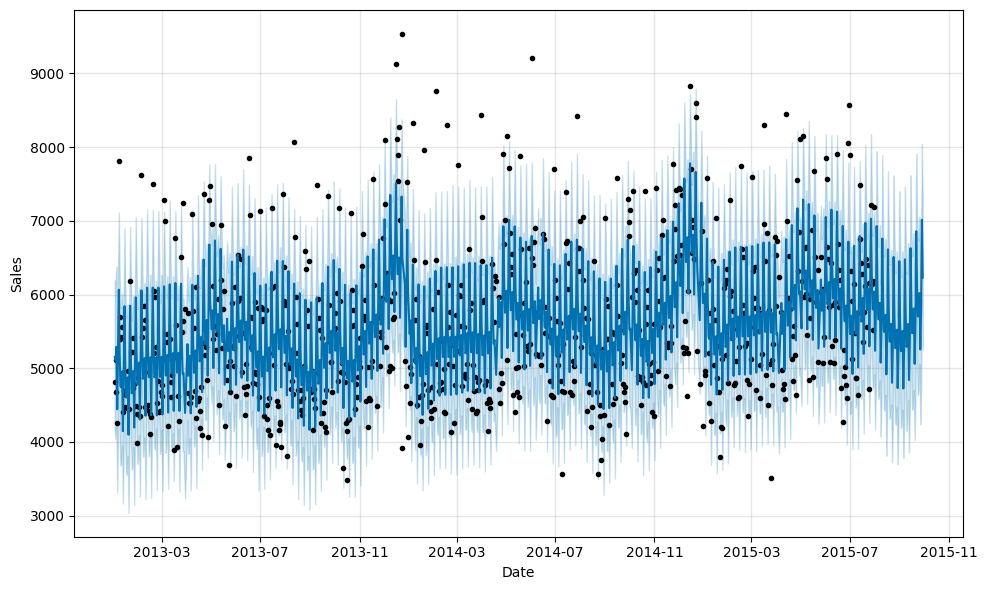

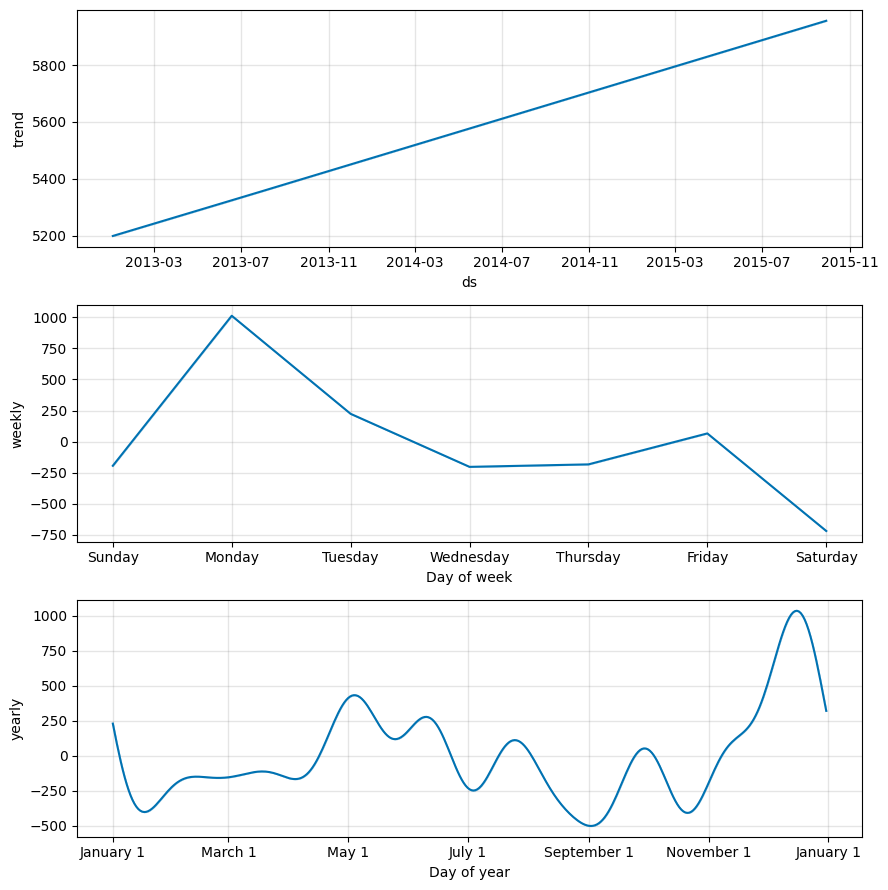

In [77]:
sales_predcition(10, sales_train_all_df, 60)
plt.show()

In [78]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
  # Function that takes in the storeID and returns two date/sales columns in Prophet format
  # Format data to fit prophet 

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].rename(columns={'ds': 'Date','yhat': 'Predicted Sales','yhat_lower': 'Lower Bound','yhat_upper': 'Upper Bound'}))
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)


In [79]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
display (school_holidays.shape)


(163457,)

In [80]:
school_holidays = pd.to_datetime(school_holidays, errors='coerce')
school_holidays.dtype

dtype('<M8[ns]')

In [81]:
print(f"Number of school holidays: {school_holidays.shape[0]}")

Number of school holidays: 163457


In [82]:
state_holidays = sales_train_all_df[ 
    (sales_train_all_df['StateHoliday'] == 'a') | 
    (sales_train_all_df['StateHoliday'] == 'b') | 
    (sales_train_all_df['StateHoliday'] == 'c') 
].loc[:, 'Date'].values


In [83]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
display(state_holidays )


,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
905,2013-01-01,state_holiday
906,2013-01-01,state_holiday
907,2013-01-01,state_holiday
908,2013-01-01,state_holiday


In [84]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})
display (school_holidays)


,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-31,school_holiday
2,2015-07-31,school_holiday
3,2015-07-31,school_holiday
4,2015-07-31,school_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


In [85]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
display (school_state_holidays)


,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


10:23:18 - cmdstanpy - INFO - Chain [1] start processing
10:23:19 - cmdstanpy - INFO - Chain [1] done processing


          Date  Predicted Sales  Lower Bound  Upper Bound
0   2013-01-02         6,520.99     5,205.33     7,825.03
1   2013-01-03         6,253.11     5,078.93     7,500.48
2   2013-01-04         6,469.83     5,232.18     7,694.38
3   2013-01-05         4,287.34     3,133.90     5,510.86
4   2013-01-07         7,173.37     5,875.59     8,435.41
..         ...              ...          ...          ...
835 2015-09-25         5,187.84     3,852.82     6,522.80
836 2015-09-26         3,097.50     1,873.34     4,350.01
837 2015-09-27         4,753.52     3,562.53     6,001.92
838 2015-09-28         6,106.96     4,817.28     7,366.50
839 2015-09-29         5,355.28     4,093.96     6,721.45

[840 rows x 4 columns]


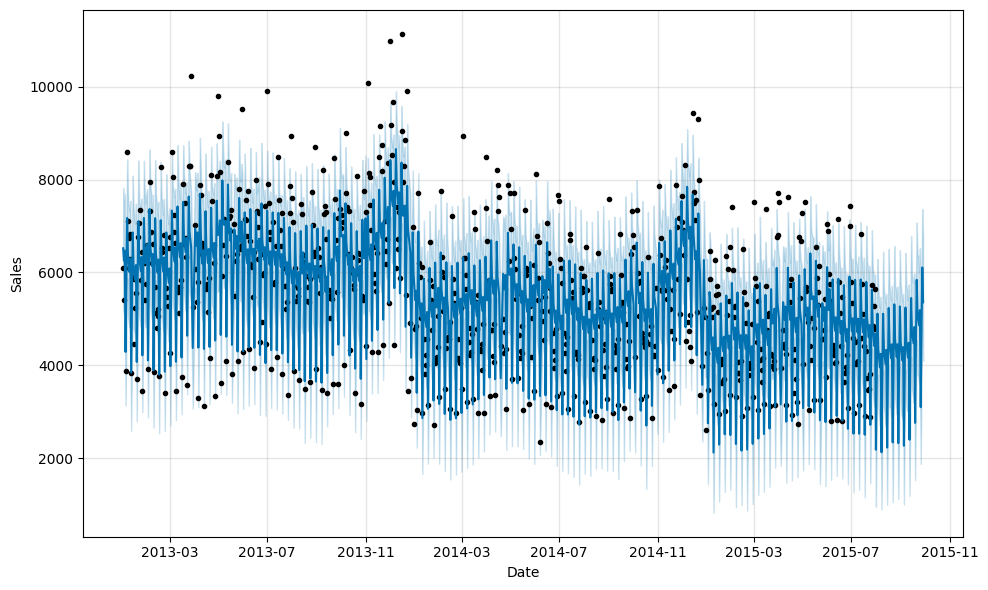

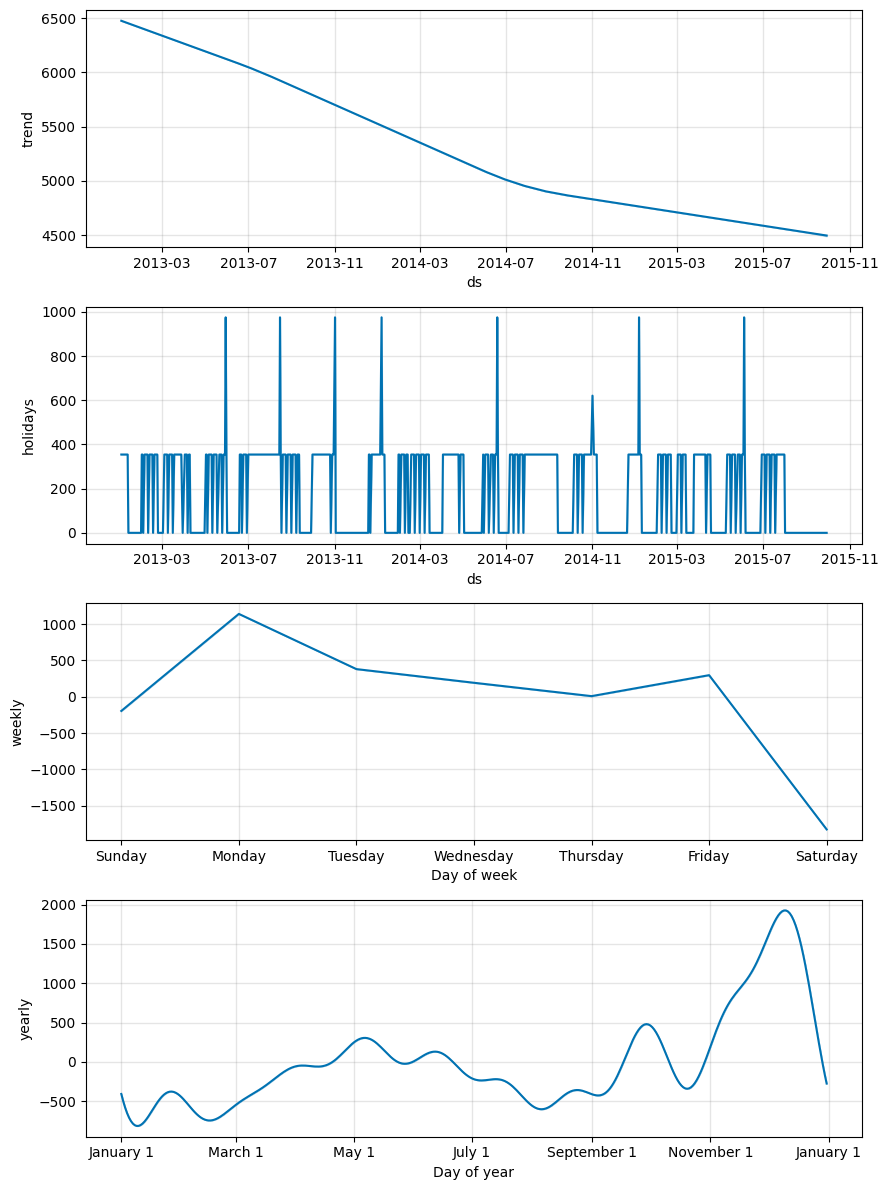

In [86]:
sales_prediction(6, sales_train_all_df, school_state_holidays, 60)

In [87]:
sales_train_all_df["Year"].unique()

array([2015, 2014, 2013])

Projected Sales in 2016 and 2017 by Year 

In [88]:
sales_data = sales_train_all_df[sales_train_all_df['Year'].isin([2013, 2014, 2015])]
sales_data = sales_data[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

In [89]:
model = Prophet(yearly_seasonality=True)

In [90]:
model.fit(sales_data)

10:27:27 - cmdstanpy - INFO - Chain [1] start processing
10:33:28 - cmdstanpy - INFO - Chain [1] done processing


In [91]:
future = model.make_future_dataframe(periods=884, freq='D')

In [92]:
forecast = model.predict(future)

In [93]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [94]:
forecast = forecast.rename(columns={'ds': 'Date', 
                                    'yhat': 'PredictedSales', 
                                    'yhat_lower': 'LowerBound', 
                                    'yhat_upper': 'UpperBound'})
forecast

,Date,trend,LowerBound,UpperBound,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,PredictedSales
0,2013-01-01,"7,055.24","3,946.18","11,317.24","7,055.24","7,055.24",273.35,273.35,273.35,-62.32,-62.32,-62.32,335.67,335.67,335.67,0.00,0.00,0.00,"7,328.59"
1,2013-01-02,"7,055.42","2,927.88","10,608.55","7,055.42","7,055.42",-209.10,-209.10,-209.10,-408.67,-408.67,-408.67,199.57,199.57,199.57,0.00,0.00,0.00,"6,846.32"
2,2013-01-03,"7,055.60","3,140.04","10,588.71","7,055.60","7,055.60",-280.27,-280.27,-280.27,-349.58,-349.58,-349.58,69.31,69.31,69.31,0.00,0.00,0.00,"6,775.33"
3,2013-01-04,"7,055.78","3,279.12","10,813.56","7,055.78","7,055.78",-112.82,-112.82,-112.82,-58.97,-58.97,-58.97,-53.86,-53.86,-53.86,0.00,0.00,0.00,"6,942.95"
4,2013-01-05,"7,055.96","1,784.42","9,740.24","7,055.96","7,055.96","-1,442.76","-1,442.76","-1,442.76","-1,273.89","-1,273.89","-1,273.89",-168.87,-168.87,-168.87,0.00,0.00,0.00,"5,613.20"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2017-12-27,"6,347.81","-48,473.58","65,703.05","-48,751.22","66,210.03",676.83,676.83,676.83,-408.67,-408.67,-408.67,"1,085.50","1,085.50","1,085.50",0.00,0.00,0.00,"7,024.64"
1822,2017-12-28,"6,346.59","-47,961.16","65,851.88","-48,854.29","66,291.74",594.78,594.78,594.78,-349.58,-349.58,-349.58,944.37,944.37,944.37,0.00,0.00,0.00,"6,941.37"
1823,2017-12-29,"6,345.37","-48,588.11","67,276.80","-48,957.35","66,362.83",741.56,741.56,741.56,-58.97,-58.97,-58.97,800.53,800.53,800.53,0.00,0.00,0.00,"7,086.93"
1824,2017-12-30,"6,344.16","-50,427.75","66,007.62","-49,060.41","66,431.50",-618.12,-618.12,-618.12,"-1,273.89","-1,273.89","-1,273.89",655.78,655.78,655.78,0.00,0.00,0.00,"5,726.04"


In [95]:
display(forecast[['Date', 'PredictedSales', 'LowerBound', 'UpperBound']].tail(731))

,Date,PredictedSales,LowerBound,UpperBound
1095,2016-01-01,"7,612.77","1,944.41","13,293.79"
1096,2016-01-02,"6,257.06",901.33,"12,266.56"
1097,2016-01-03,"8,472.75","2,787.10","14,297.89"
1098,2016-01-04,"8,340.81","2,839.13","14,445.13"
1099,2016-01-05,"7,080.40","1,852.39","13,046.54"
...,...,...,...,...
1821,2017-12-27,"7,024.64","-48,473.58","65,703.05"
1822,2017-12-28,"6,941.37","-47,961.16","65,851.88"
1823,2017-12-29,"7,086.93","-48,588.11","67,276.80"
1824,2017-12-30,"5,726.04","-50,427.75","66,007.62"


In [96]:
forecast["Date"].dtype

dtype('<M8[ns]')

In [97]:
forecast['year'] = forecast['Date'].dt.year
sales_by_year = forecast[forecast['year'].isin([2016, 2017])].groupby('year')['PredictedSales'].sum()

In [98]:
display(sales_by_year)

year
2016   2,564,299.34
2017   2,396,958.91
Name: PredictedSales, dtype: float64

Projected Sales 2016 and 2017 month wise 

In [99]:
forecast['Date'] = pd.to_datetime(forecast['Date'])
forecast['year'] = forecast['Date'].dt.year
forecast['month'] = forecast['Date'].dt.month
forecast_2016_2017 = forecast[forecast['year'].isin([2016, 2017])]
monthly_sales_2016_2017 = forecast_2016_2017.groupby(['year', 'month'])['PredictedSales'].sum().reset_index()
display(monthly_sales_2016_2017)

,year,month,PredictedSales
0,2016,1,"208,032.61"
1,2016,2,"191,624.43"
2,2016,3,"207,959.30"
3,2016,4,"210,586.93"
4,2016,5,"224,477.01"
5,2016,6,"204,150.64"
6,2016,7,"211,627.45"
7,2016,8,"220,838.71"
8,2016,9,"207,584.38"
9,2016,10,"212,743.76"


Number of  customers expected in 2016 and 2017 month wise


In [100]:
customer_data = sales_train_all_df[sales_train_all_df['Year'].isin([2013, 2014, 2015])]
customer_data = customer_data[['Date','Customers']].rename(columns={'Date': 'ds', 'Customers': 'y'})
model = Prophet(yearly_seasonality=True)
model.fit(customer_data)
future = model.make_future_dataframe(periods=884, freq='D')
forecast = model.predict(future)
forecast = forecast.rename(columns={'ds': 'Date', 
                                    'yhat': 'Predicted Customers', 
                                    'yhat_lower': 'LowerBound', 
                                    'yhat_upper': 'UpperBound'})
display(forecast[['Date', 'Predicted Customers', 'LowerBound', 'UpperBound']].tail(731))


10:35:45 - cmdstanpy - INFO - Chain [1] start processing
10:38:34 - cmdstanpy - INFO - Chain [1] done processing


,Date,Predicted Customers,LowerBound,UpperBound
1095,2016-01-01,789.44,286.44,"1,322.42"
1096,2016-01-02,654.73,143.49,"1,171.22"
1097,2016-01-03,"1,422.87",894.57,"1,937.84"
1098,2016-01-04,828.76,306.71,"1,359.15"
1099,2016-01-05,732.44,247.10,"1,260.64"
...,...,...,...,...
1821,2017-12-27,711.08,-763.50,"2,048.94"
1822,2017-12-28,716.45,-696.43,"2,112.38"
1823,2017-12-29,729.84,-763.49,"2,057.58"
1824,2017-12-30,594.97,-810.47,"1,932.30"


In [101]:
sales_with_promo_data = sales_train_all_df[(sales_train_all_df['Year'].isin([2013, 2014, 2015])) & (sales_train_all_df['Promo'] == 1)]

sales_with_promo_data = sales_with_promo_data[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

model = Prophet(yearly_seasonality=True)
model.fit(sales_with_promo_data)
future = model.make_future_dataframe(periods=884, freq='D')

forecast = model.predict(future)
forecast = forecast.rename(columns={'ds': 'Date', 
                                    'yhat': 'PredictedSalesWithPromo', 
                                    'yhat_lower': 'LowerBound', 
                                    'yhat_upper': 'UpperBound'})

10:39:42 - cmdstanpy - INFO - Chain [1] start processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing


In [102]:
display(forecast[['Date', 'PredictedSalesWithPromo', 'LowerBound', 'UpperBound']].tail(731))

,Date,PredictedSalesWithPromo,LowerBound,UpperBound
513,2016-01-01,"9,419.20","1,653.71","17,336.90"
514,2016-01-02,"9,196.54","1,689.20","17,677.53"
515,2016-01-03,"9,011.82","1,192.79","17,397.93"
516,2016-01-04,"10,879.48","2,714.44","19,231.94"
517,2016-01-05,"9,207.14","1,011.99","17,675.41"
...,...,...,...,...
1239,2017-12-27,"11,302.32","-79,987.19","106,044.04"
1240,2017-12-28,"11,068.86","-79,192.64","106,747.23"
1241,2017-12-29,"11,046.73","-79,874.63","104,367.12"
1242,2017-12-30,"10,828.71","-79,870.24","104,927.74"


In [103]:
forecast['year'] = forecast['Date'].dt.year
forecast['month'] = forecast['Date'].dt.month

forecast_2016_2017 = forecast[forecast['year'].isin([2016, 2017])]

monthly_sales_with_promo = forecast_2016_2017.groupby(['year', 'month'])['PredictedSalesWithPromo'].sum().reset_index()
display(monthly_sales_with_promo)

,year,month,PredictedSalesWithPromo
0,2016,1,"256,667.26"
1,2016,2,"243,434.59"
2,2016,3,"272,140.94"
3,2016,4,"276,313.10"
4,2016,5,"273,910.50"
5,2016,6,"271,637.54"
6,2016,7,"273,605.41"
7,2016,8,"268,923.11"
8,2016,9,"250,690.75"
9,2016,10,"253,031.80"


In [104]:
store_sales_predictions = pd.DataFrame()
for store_id in sales_train_all_df['Store'].unique():
    store_data = sales_train_all_df[sales_train_all_df['Store'] == store_id]
    store_data = store_data[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    
    model = Prophet(yearly_seasonality=True)
    model.fit(store_data)
    future = model.make_future_dataframe(periods=884, freq='D')
    forecast = model.predict(future)
    forecast['Store'] = store_id
    store_sales_predictions = pd.concat([store_sales_predictions, forecast[['Store', 'ds', 'yhat']]], ignore_index=True)

store_sales_predictions = store_sales_predictions.rename(columns={'ds': 'Date', 'yhat': 'PredictedSales'})
store_sales_predictions['year'] = store_sales_predictions['Date'].dt.year
store_sales_predictions['month'] = store_sales_predictions['Date'].dt.month

store_sales_predictions_2016_2017 = store_sales_predictions[store_sales_predictions['year'].isin([2016, 2017])]

sales_by_store = store_sales_predictions_2016_2017.groupby('Store')['PredictedSales'].sum().reset_index()
top_10_stores_by_sales = sales_by_store.sort_values(by='PredictedSales', ascending=False).head(10)
display(top_10_stores_by_sales)


10:43:13 - cmdstanpy - INFO - Chain [1] start processing
10:43:13 - cmdstanpy - INFO - Chain [1] done processing
10:43:14 - cmdstanpy - INFO - Chain [1] start processing
10:43:14 - cmdstanpy - INFO - Chain [1] done processing
10:43:15 - cmdstanpy - INFO - Chain [1] start processing
10:43:15 - cmdstanpy - INFO - Chain [1] done processing
10:43:16 - cmdstanpy - INFO - Chain [1] start processing
10:43:16 - cmdstanpy - INFO - Chain [1] done processing
10:43:17 - cmdstanpy - INFO - Chain [1] start processing
10:43:18 - cmdstanpy - INFO - Chain [1] done processing
10:43:19 - cmdstanpy - INFO - Chain [1] start processing
10:43:19 - cmdstanpy - INFO - Chain [1] done processing
10:43:20 - cmdstanpy - INFO - Chain [1] start processing
10:43:20 - cmdstanpy - INFO - Chain [1] done processing
10:43:21 - cmdstanpy - INFO - Chain [1] start processing
10:43:21 - cmdstanpy - INFO - Chain [1] done processing
10:43:22 - cmdstanpy - INFO - Chain [1] start processing
10:43:22 - cmdstanpy - INFO - Chain [1]

,Store,PredictedSales
1113,1114,"19,330,600.71"
841,842,"16,849,513.62"
261,262,"15,522,626.46"
250,251,"15,391,037.47"
191,192,"14,701,788.02"
787,788,"13,858,397.65"
755,756,"13,630,317.16"
816,817,"13,574,616.99"
561,562,"13,300,692.73"
697,698,"13,288,975.98"


In [105]:

store_sales_predictions_2016_2017 = store_sales_predictions[store_sales_predictions['year'].isin([2016, 2017])]
sales_by_store = store_sales_predictions_2016_2017.groupby('Store')['PredictedSales'].sum().reset_index()
bottom_10_stores_by_sales = sales_by_store.sort_values(by='PredictedSales', ascending=True).head(10)
display(bottom_10_stores_by_sales)


,Store,PredictedSales
838,839,"739,374.58"
90,91,"1,134,049.69"
168,169,"1,464,054.72"
901,902,"1,638,950.50"
840,841,"1,697,206.25"
955,956,"1,710,287.51"
542,543,"1,834,520.49"
969,970,"1,986,924.02"
306,307,"1,988,218.21"
769,770,"1,998,356.68"
